# Previsão de Demanda com Séries Temporais

<a id="indice"></a>
# Índice

1. [EDA - Exploração Inicial dos Dados](#eda)
   - 1.1 [Carregando os dados](#carregando-os-dados)
   - 1.2 [Analisando os dados](#analisando-os-dados)
   - 1.3 [Ajustando as datas para análise exploratória](#ajustando)
   - 1.4 [Verificando Valores Ausentes](#verificando)
   - 1.5 [Utilizando o Boxplot para Visualização de Outliers](#utilizando)
   - 1.6 [Contando o Número de Outliers](#contando)
   - 1.7 [Substituição dos outliers pela mediana](#substituicao)
   - 1.8 [Análise de Correlação entre Categorias](#analise)
   - 1.9 [Analisando valores únicos](#analisando-valores)
   - 1.10 [Análise mais profunda](#analise-profunda)
   - 1.11 [Gráfico Demanda por produto](#grafico-demanda-produto)
   - 1.12 [Verificar a Tabela de Demanda por Categoria e Produto](#verificar-tabela-demanda)
   - 1.13 [Gráfico Demanda por categoria](#grafico-demanda-categoria)
   - 1.14 [Verificação de Produtos nas Categorias](#verifica-produtos-categorias)
   - 1.15 [Tabela Produtos por Categoria](#tabela-produtos-categoria)
   - 1.16 [Gráfico Fornecedores e Centros de Distribuição](#grafico-fornecedores-centros-distribuição)
   - 1.17 [Gráfico dos Compradores](#grafico-compradores)
   - 1.18 [Gráfico Produtos por Comprador](#grafico-produtos-comprador)
   - 1.19 [Estatísticas Descritivas para as variáveis numéricas](#estatisticas-descritivas-numéricas)
   - 1.20 [Valores Negativos](#valores-negativos)

2. [Modelagem - ARIMA e XGBoost](#modelagem---arima-e-xgboost)
   - 2.1 [Modelagem - ARIMA Top-Down com Validação Cruzada](#modelagem---arima-top-down-com-validação-cruzada)
   - 2.2 [Modelagem - ARIMA Top-Down com Ajuste p,d,q](#modelagem---arima-top-down-com-ajuste-pdq)
   - 2.3 [Modelagem - XGBoost](#modelagem---xgboost)
   - 2.4 [Modelagem - XGBoost validação cruzada e Fine-Tuning](#modelagem---xgboost-validação-cruzada-e-fine-tuning)

3. [Métricas de Avaliação](#metricas-de-avaliação)
   - 3.1 [Análise das Métricas de Avaliação](#analise-das-metricas-de-avaliação)
   - 3.2 [Comparação das Métricas](#comparacao-das-metricas)
   - 3.3 [Melhor Métrica para o Problema](#melhor-metrica-para-o-problema)

4. [Ajuste de Hiperparâmetros](#ajuste-de-hiperparâmetros)

5. [Análise de Resíduos](#analise-de-residuos)
   - 5.1 [Resultados da Análise de Resíduos do Modelo ARIMA](#resultados-da-análise-de-residuos-do-modelo-arima)
   - 5.2 [Conclusão da análise de resíduos](#conclusao-da-analise-de-residuos)


---
<a id="eda"></a>
# 1. EDA - Exploração Inicial dos Dados

<a id="carregando-os-dados"></a>
## 1.1 Carregando os dados
[Voltar ao Índice](#indice)


In [1]:
# Importando as bilbiotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
# Carrega os dados
df = pd.read_csv('df_case_1_-_500_linhas.csv')
# Verifca as 10 primeiras linhas
df.head(10)

,CATEGORIA,PRODUTO,FORNECEDOR,COMPRADOR,CENTROS DE DISTRIBUICAO,DESCRICAO,QTD DE CAIXAS,MAR22,ABR22,MAI22,...,JUN23,JUL23,AGO23,SET23,OUT23,NOV23,DEZ23,JAN24,FEV24,MAR24
0,A,A,A,A,A,A,109,356,374,408,...,404,350,466,290,476,524,273,199,313,197
1,A,A,A,A,B,B,70,994,723,1310,...,1897,1840,2427,1655,1669,1970,1700,1895,1385,2243
2,B,B,B,B,C,C,123,74,65,71,...,144,57,69,165,129,153,149,145,125,132
3,B,C,C,C,D,D,196,520,466,603,...,496,568,443,304,408,372,315,447,610,776
4,A,D,A,A,E,E,99,37,1,78,...,75,60,85,13,45,24,8,64,79,96
5,B,E,D,B,F,F,67,38,56,41,...,47,5,77,94,119,64,71,82,131,80
6,C,F,E,C,F,G,109,88,98,14,...,109,76,112,103,64,85,30,70,34,49
7,D,G,F,C,G,H,36,469,394,488,...,314,252,300,240,271,235,196,414,334,436
8,B,H,G,C,G,I,160,270,105,155,...,112,203,141,104,84,34,55,87,79,23
9,A,I,B,B,H,J,137,1228,1175,2521,...,2009,2435,3298,1199,1712,1241,2616,1675,1553,1737


<a id="analisando-os-dados"></a>
## 1.2 Analisando os dados
[Voltar ao Índice](#indice)

In [2]:
# Verifica as colunas do dataset
df.columns

Index(['CATEGORIA', 'PRODUTO', 'FORNECEDOR', 'COMPRADOR',
       'CENTROS DE DISTRIBUICAO', 'DESCRICAO', 'QTD DE CAIXAS', 'MAR22',
       'ABR22', 'MAI22', 'JUN22', 'JUL22', 'AGO22', 'SET22', 'OUT22', 'NOV22',
       'DEZ22', 'JAN23', 'FEV23', 'MAR23', 'ABR23', 'MAI23', 'JUN23', 'JUL23',
       'AGO23', 'SET23', 'OUT23', 'NOV23', 'DEZ23', 'JAN24', 'FEV24', 'MAR24'],
      dtype='object')

In [3]:
# Verifica as informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CATEGORIA                500 non-null    object
 1   PRODUTO                  500 non-null    object
 2   FORNECEDOR               500 non-null    object
 3   COMPRADOR                500 non-null    object
 4   CENTROS DE DISTRIBUICAO  500 non-null    object
 5   DESCRICAO                500 non-null    object
 6   QTD DE CAIXAS            500 non-null    int64 
 7   MAR22                    500 non-null    int64 
 8   ABR22                    500 non-null    int64 
 9   MAI22                    500 non-null    int64 
 10  JUN22                    500 non-null    int64 
 11  JUL22                    500 non-null    int64 
 12  AGO22                    500 non-null    int64 
 13  SET22                    500 non-null    int64 
 14  OUT22                    500 non-null    i

In [4]:
# Verifica os dados estatísticos
df.describe()

,QTD DE CAIXAS,MAR22,ABR22,MAI22,JUN22,JUL22,AGO22,SET22,OUT22,NOV22,...,JUN23,JUL23,AGO23,SET23,OUT23,NOV23,DEZ23,JAN24,FEV24,MAR24
count,500.000000,500.000000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,104.142000,346.214000,256.946000,370.8640,377.400000,369.646000,349.626000,309.992000,271.764000,340.622000,...,381.548000,385.842000,335.562000,271.966000,273.45000,351.172000,289.006000,306.52800,313.972000,322.302000
std,80.826925,1088.249907,690.142455,1309.8818,1208.011127,1291.151896,1113.839579,1111.134537,765.724598,940.956684,...,1102.948499,1068.121003,856.861584,697.109239,701.22524,1195.906484,743.002471,843.46736,891.374458,844.772685
min,7.000000,1.000000,1.000000,1.0000,1.000000,-10.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,2.000000,1.00000,1.000000,1.000000,2.00000,1.000000,5.000000
25%,62.000000,46.000000,48.000000,49.0000,47.000000,47.000000,47.750000,49.750000,47.000000,51.750000,...,54.750000,57.000000,55.750000,56.000000,55.75000,54.000000,51.000000,51.75000,58.750000,55.000000
50%,92.000000,83.000000,85.000000,86.5000,85.000000,87.000000,82.500000,84.000000,85.500000,91.000000,...,90.500000,93.000000,92.000000,91.500000,92.50000,90.500000,88.500000,97.00000,93.000000,97.000000
75%,125.250000,174.500000,154.250000,207.2500,204.000000,206.000000,199.500000,183.750000,173.750000,198.250000,...,203.000000,238.250000,211.250000,207.500000,198.25000,213.250000,199.000000,208.75000,194.750000,226.000000
max,1059.000000,12032.000000,7421.000000,16940.0000,16075.000000,18188.000000,13183.000000,19875.000000,10000.000000,10626.000000,...,11673.000000,11726.000000,7635.000000,9522.000000,8582.00000,20746.000000,10334.000000,11917.00000,10732.000000,8671.000000


In [5]:
# Usando a função melt para transformar o dataset no formato longo
df_melted = pd.melt(df,
                    id_vars=['CATEGORIA', 'PRODUTO', 'FORNECEDOR', 'COMPRADOR', 'CENTROS DE DISTRIBUICAO', 'DESCRICAO', 'QTD DE CAIXAS'],
                    var_name='DATA',
                    value_name='VENDA')

# Exibe o datasaet transformado
from IPython.display import display
display(df_melted)

,CATEGORIA,PRODUTO,FORNECEDOR,COMPRADOR,CENTROS DE DISTRIBUICAO,DESCRICAO,QTD DE CAIXAS,DATA,VENDA
0,A,A,A,A,A,A,109,MAR22,356
1,A,A,A,A,B,B,70,MAR22,994
2,B,B,B,B,C,C,123,MAR22,74
3,B,C,C,C,D,D,196,MAR22,520
4,A,D,A,A,E,E,99,MAR22,37
...,...,...,...,...,...,...,...,...,...
12495,B,A,A,A,U,X,114,MAR24,7979
12496,B,M,I,C,H,Y,27,MAR24,73
12497,A,R,M,C,J,E,109,MAR24,156
12498,D,Q,K,B,X,Z,132,MAR24,109


<a id="ajustando"></a>
## 1.3 Ajustando as datas para análise exploratória
[Voltar ao Índice](#indice)

In [6]:
# Ajuste de mapeamento de meses em português para números
meses_map = {
    'JAN': '01', 'FEV': '02', 'MAR': '03', 'ABR': '04', 'MAI': '05', 'JUN': '06',
    'JUL': '07', 'AGO': '08', 'SET': '09', 'OUT': '10', 'NOV': '11', 'DEZ': '12'
}

# Substitui os nomes dos meses abreviados por números correspondentes
for mes_abrev, mes_num in meses_map.items():
    df_melted['DATA'] = df_melted['DATA'].str.replace(mes_abrev, mes_num)

# Converte as strings para o formato de data'mmYY'
df_melted['DATA'] = pd.to_datetime(df_melted['DATA'], format='%m%y', errors='coerce')

# Verifica as datas que foram convertidas corretamente
print(df_melted['DATA'].head())

# Remove datas inválidas (caso ocorram após a conversão)
df_melted = df_melted.dropna(subset=['DATA'])

# Agrupa os dados por data e calcula a soma das vendas
df_grouped = df_melted.groupby('DATA')['VENDA'].sum()

# Verifica o agrupamento para garantir que os dados estejam corretos
print(df_grouped)

# Define a coluna 'DATA' como o índice, o que é necessário para o ARIMA e SARIMA
df_grouped.index = pd.to_datetime(df_grouped.index)

# Garante que os dados estão na frequência correta (neste caso, mensal)
df_grouped = df_grouped.asfreq('M')

# Preenche valores ausentes se necessário (aqui usando forward fill)
df_grouped.fillna(method='ffill', inplace=True)

0   2022-03-01
1   2022-03-01
2   2022-03-01
3   2022-03-01
4   2022-03-01
Name: DATA, dtype: datetime64[ns]
DATA
2022-03-01    173107
2022-04-01    128473
2022-05-01    185432
2022-06-01    188700
2022-07-01    184823
2022-08-01    174813
2022-09-01    154996
2022-10-01    135882
2022-11-01    170311
2022-12-01    161603
2023-01-01    146464
2023-02-01    153580
2023-03-01    180321
2023-04-01    154680
2023-05-01    170076
2023-06-01    190774
2023-07-01    192921
2023-08-01    167781
2023-09-01    135983
2023-10-01    136725
2023-11-01    175586
2023-12-01    144503
2024-01-01    153264
2024-02-01    156986
2024-03-01    161151
Name: VENDA, dtype: int64


C:\Users\Usuário\AppData\Local\Temp\ipykernel_15380\1356890979.py:30: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df_grouped.asfreq('M')
C:\Users\Usuário\AppData\Local\Temp\ipykernel_15380\1356890979.py:33: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_grouped.fillna(method='ffill', inplace=True)


<a id="verificando"></a>
## 1.4 Verificando Valores Ausentes
[Voltar ao Índice](#indice)

In [7]:
# Verifica os valores ausentes no dataset
valores_ausentes = df_melted.isnull().sum()

# Exibindo os valores ausentes
print("Valores ausentes por coluna:")
print(valores_ausentes)


Valores ausentes por coluna:
CATEGORIA                  0
PRODUTO                    0
FORNECEDOR                 0
COMPRADOR                  0
CENTROS DE DISTRIBUICAO    0
DESCRICAO                  0
QTD DE CAIXAS              0
DATA                       0
VENDA                      0
dtype: int64


<a id="utilizando"></a>
## 1.5 Utilizando o Boxplot para Visualização de Outliers
[Voltar ao Índice](#indice)

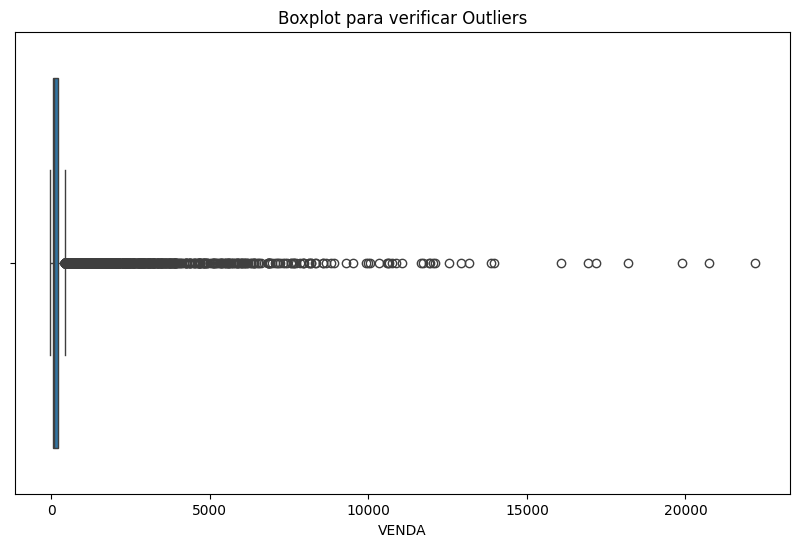

In [8]:
# Cria o boxplots para verificar outliers na coluna 'VENDA'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_melted['VENDA'])
plt.title('Boxplot para verificar Outliers')
plt.show()


<a id="contando"></a>
## 1.6 Contando o Número de Outliers
[Voltar ao Índice](#indice)

In [9]:
# Calcula os quartis e o IQR
Q1 = df_melted['VENDA'].quantile(0.25)
Q3 = df_melted['VENDA'].quantile(0.75)
IQR = Q3 - Q1

# Definindo os limites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificando os outliers
outliers = df_melted[(df_melted['VENDA'] < lower_bound) | (df_melted['VENDA'] > upper_bound)]

# Contando o número de outliers
numero_outliers = outliers.shape[0]

# Exibe o número de outliers
print(f"Número de outliers encontrados: {numero_outliers}")


Número de outliers encontrados: 1712


<a id="substituicao"></a>
## 1.7 Substituição dos outliers pela mediana
[Voltar ao Índice](#indice)


In [10]:
# Calcula a mediana da coluna 'VENDA'
mediana = df_melted['VENDA'].median()

# Substitui os outliers pela mediana
df_melted['VENDA'] = df_melted['VENDA'].apply(lambda x: mediana if (x < lower_bound or x > upper_bound) else x)

# Verifica se os outliers foram removidos corretamente
outliers_apos_substituicao = df_melted[(df_melted['VENDA'] < lower_bound) | (df_melted['VENDA'] > upper_bound)].shape[0]

print(f"Número de outliers após a substituição: {outliers_apos_substituicao}")

Número de outliers após a substituição: 0


<a id="analise"></a>
## 1.8 Análise de Correlação entre Categorias
[Voltar ao Índice](#indice)


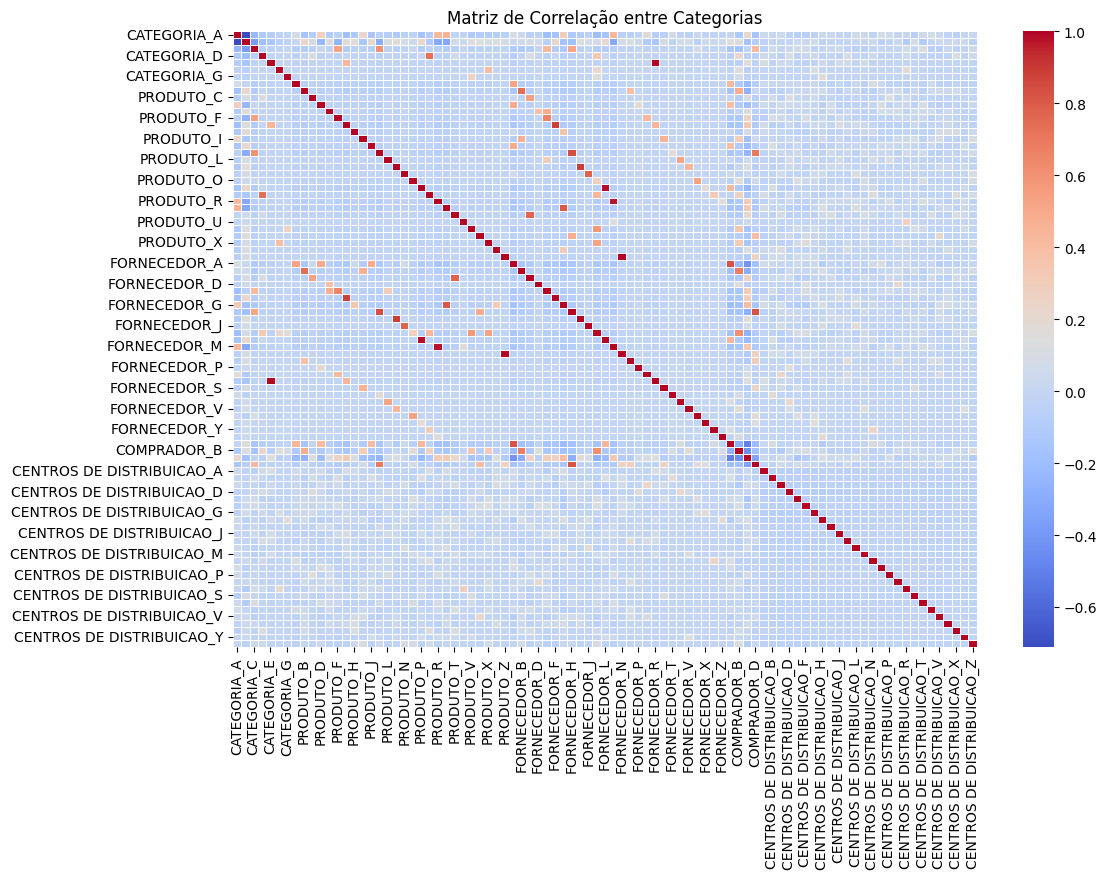

In [11]:
# Codifica as variáveis categóricas usando pd.get_dummies para análise de correlação
df_encoded = pd.get_dummies(df[['CATEGORIA', 'PRODUTO', 'FORNECEDOR', 'COMPRADOR', 'CENTROS DE DISTRIBUICAO']])

# Calcula a matriz de correlação
correlation_matrix = df_encoded.corr()

# Cria o gráfico da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre Categorias')
plt.show()

<b>Principais insights:</b>


1. **Correlação Negativa entre Categorias**:
   - **CATEGORIA A e CATEGORIA B** têm uma correlação negativa significativa (-0.71), indicando que quando uma categoria aumenta, a outra tende a diminuir.

2. **Correlação Fraca**:
   - A maioria das outras correlações entre as categorias e produtos são fracas (próximas de zero), indicando que não há relações significativas. Por exemplo, **CATEGORIA C** e **CATEGORIA D** possuem uma correlação de -0.06, que é praticamente irrelevante.

3. **Relações entre Produtos e Categorias**:
   - Há algumas correlações entre produtos e categorias, mas muitas delas também são fracas. A correlação de **PRODUTO A** com **CATEGORIA B** é de 0.22, o que pode indicar alguma relação positiva entre esses dois, sugerindo que um aumento em produtos dessa categoria pode estar associado a um aumento nas vendas de **PRODUTO A**.

4. **Centros de Distribuição**:
   - As correlações entre as diferentes **CATEGORIAS** e **CENTROS DE DISTRIBUICAO** também mostram valores baixos, o que pode sugerir que a distribuição não está fortemente relacionada com as categorias ou produtos específicos.


<a id="analisando-valores"></a>
## 1.9 Analisando valores únicos
[Voltar ao Índice](#indice)


In [12]:
# verifica os valores únicos e a distribuição das colunas categóricas para encontrar algo útil
categorical_columns = ['CATEGORIA', 'PRODUTO', 'FORNECEDOR', 'COMPRADOR', 'CENTROS DE DISTRIBUICAO']

# Verifica os valores únicos e faz contagem em cada coluna categórica
categorical_summary = {col: df[col].value_counts() for col in categorical_columns}

# Exibe os resultados
categorical_summary

{'CATEGORIA': CATEGORIA
 B    271
 A    150
 C     53
 D     15
 E      8
 F      2
 G      1
 Name: count, dtype: int64,
 'PRODUTO': PRODUTO
 R    42
 S    41
 G    39
 B    39
 K    34
 P    29
 A    27
 F    26
 D    26
 J    24
 I    19
 T    17
 H    16
 M    15
 V    14
 C    14
 E    13
 X    12
 W    11
 Q    10
 Y     7
 O     7
 L     7
 N     5
 Z     5
 U     1
 Name: count, dtype: int64,
 'FORNECEDOR': FORNECEDOR
 A    85
 G    60
 B    48
 H    44
 M    42
 K    40
 E    37
 F    31
 C    28
 L    28
 I    12
 R     8
 O     6
 Q     5
 N     5
 S     4
 J     3
 V     3
 D     2
 U     2
 W     2
 P     1
 T     1
 X     1
 Y     1
 Z     1
 Name: count, dtype: int64,
 'COMPRADOR': COMPRADOR
 C    227
 A    116
 B     95
 D     62
 Name: count, dtype: int64,
 'CENTROS DE DISTRIBUICAO': CENTROS DE DISTRIBUICAO
 D    40
 G    37
 H    32
 A    31
 C    31
 B    30
 F    29
 E    28
 K    19
 J    18
 M    18
 S    17
 V    16
 N    16
 U    14
 I    14
 W    14
 Y    14
 R

<b>1. CATEGORIA</b>
A coluna **CATEGORIA** apresenta 7 categorias distintas. A distribuição é a seguinte:
- **Categoria B**: 271 registros, sendo a mais frequente.
- **Categoria A**: 150 registros.
- **Categoria C**: 53 registros.
- **Categoria D**: 15 registros.
- **Categoria E**: 8 registros.
- **Categoria F**: 2 registros.
- **Categoria G**: 1 registro, a menos frequente.

<b>2. PRODUTO</b>
A coluna **PRODUTO** apresenta 26 produtos diferentes. Alguns destaques:
- **Produto R**: 42 registros, o mais frequente.
- **Produtos S, G, B**: Com 41, 39, e 39 registros, respectivamente.
- **Produto P**: 29 registros.
- **Produto U**: Apenas 1 registro, sendo o menos frequente.

<b>3. FORNECEDOR</b>
A coluna **FORNECEDOR** apresenta 26 fornecedores diferentes, com a seguinte distribuição:
- **Fornecedor A**: 85 registros, sendo o mais frequente.
- **Fornecedor G**: 60 registros.
- **Fornecedor B**: 48 registros.
- **Fornecedores P, T, X, Y, Z**: Apenas 1 registro cada, sendo os menos frequentes.

<b>4. COMPRADOR</b>
A coluna **COMPRADOR** apresenta 4 compradores:
- **Comprador C**: 227 registros, sendo o mais ativo.
- **Compradores A e B**: 116 e 95 registros, respectivamente.
- **Comprador D**: 62 registros, o menos ativo.

<b>5. CENTROS DE DISTRIBUICAO</b>
A coluna **CENTROS DE DISTRIBUICAO** apresenta 26 centros de distribuição diferentes, com a seguinte distribuição:
- **Centro D**: 40 registros, sendo o mais frequente.
- **Centros G e H**: Com 37 e 32 registros, respectivamente.
- **Centros X e O**: 4 e 9 registros, sendo os menos frequentes.


<b>Insights:</b>
- A categoria **B** domina o dataset, representando mais da metade dos registros.
- O comprador **C** também aparece em mais da metade das compras.
- A distribuição de produtos, fornecedores e centros de distribuição mostra que existem alguns itens altamente dominantes (por exemplo, **R**, **A**, **C**) e muitos itens com menor presença.


Oportunidades de Análise:
Categorias e Produtos: Algumas categorias e produtos são muito dominantes, o que pode sugerir a análise de performance por essas categorias. Por exemplo, a categoria B tem mais produtos associados. Pode analisar a demanda por produtos nas categorias A e B.

Fornecedores e Centros de Distribuição: Existem alguns fornecedores e centros de distribuição que são dominantes. Podemos explorar o impacto desses fornecedores nos resultados e fazer comparações de desempenho entre fornecedores grandes e pequenos.

Compradores: Como o comprador C tem grande representatividade, pode ser interessante analisar a demanda focada nos produtos adquiridos por esse comprador.

<a id="analise-profunda"></a>
## 1.10 Análise mais profunda
[Voltar ao Índice](#indice)


<b>Categorias e Produtos:</b>

In [13]:
# Seleciona apenas as colunas de meses (de MAR22 a MAR24) e as colunas categóricas
categorical_columns = ['CATEGORIA', 'PRODUTO']
monthly_columns = df.columns[7:]  # Colunas de meses de MAR22 a MAR24

# Agrupa por CATEGORIA e PRODUTO e soma os valores mensais
df_grouped = df.groupby(['CATEGORIA', 'PRODUTO'])[monthly_columns].sum()

# Exibe a soma total de demanda por categoria e produto
df_grouped_total = df_grouped.sum(axis=1).reset_index()  # Somar os valores ao longo de todos os meses
df_grouped_total.columns = ['CATEGORIA', 'PRODUTO', 'DEMANDA_TOTAL']

# Ordena pela demanda total em ordem decrescente
df_grouped_total = df_grouped_total.sort_values(by='DEMANDA_TOTAL', ascending=False)

# Exibe os resultados
print(df_grouped_total)

   CATEGORIA PRODUTO  DEMANDA_TOTAL
24         B       P         619016
33         B       Z         390847
12         B       B         312544
11         B       A         271103
29         B       V         249145
9          A       S         233082
8          A       R         219335
0          A       A         215334
17         B       H         182281
19         B       J         165964
16         B       G         164674
5          A       I         141630
3          A       D         135443
22         B       N          98553
42         D       P          82023
13         B       C          65668
15         B       E          53048
35         C       F          44958
43         D       Q          44100
36         C       K          42356
20         B       L          38516
30         B       W          36010
45         E       G          33834
18         B       I          32545
32         B       Y          30073
21         B       M          26065
27         B       T        

<b>Análise da Demanda Total por Categoria e Produto</b>

A análise dos resultados revela as seguintes informações sobre a demanda total de produtos agrupados por categoria:


**Demanda Total por Categoria e Produto**:
   - A tabela mostra os produtos com a maior demanda total ao longo do período de março de 2022 a março de 2024, organizados de forma decrescente.

**Produtos Mais Vendidos**:
   - O produto **P** da **Categoria B** lidera com uma demanda total de **619.016**, seguido pelo produto **Z**, também na **Categoria B**, com **390.847**.
   - Outros produtos da **Categoria B** incluem:
     - **B**: 312.544
     - **A**: 271.103
     - **V**: 249.145

<b>Interpretação dos Resultados</b>

- **Predomínio da Categoria B**:
  - Os principais produtos listados pertencem à **Categoria B**, o que sugere que essa categoria é extremamente forte em termos de vendas.

- **Oportunidades de Vendas**:
  - Com a identificação dos produtos mais vendidos, estratégias específicas podem ser desenvolvidas para impulsionar ainda mais as vendas, como promoções ou aumentos de estoque desses itens.

- **Análise de Desempenho**:
  - A demanda total fornece uma visão do desempenho de cada produto ao longo do tempo, o que pode ser útil para prever a demanda futura.



<a id="grafico-demanda-produto"></a>
## 1.11 Gráfico Demanda por produto
[Voltar ao Índice](#indice)


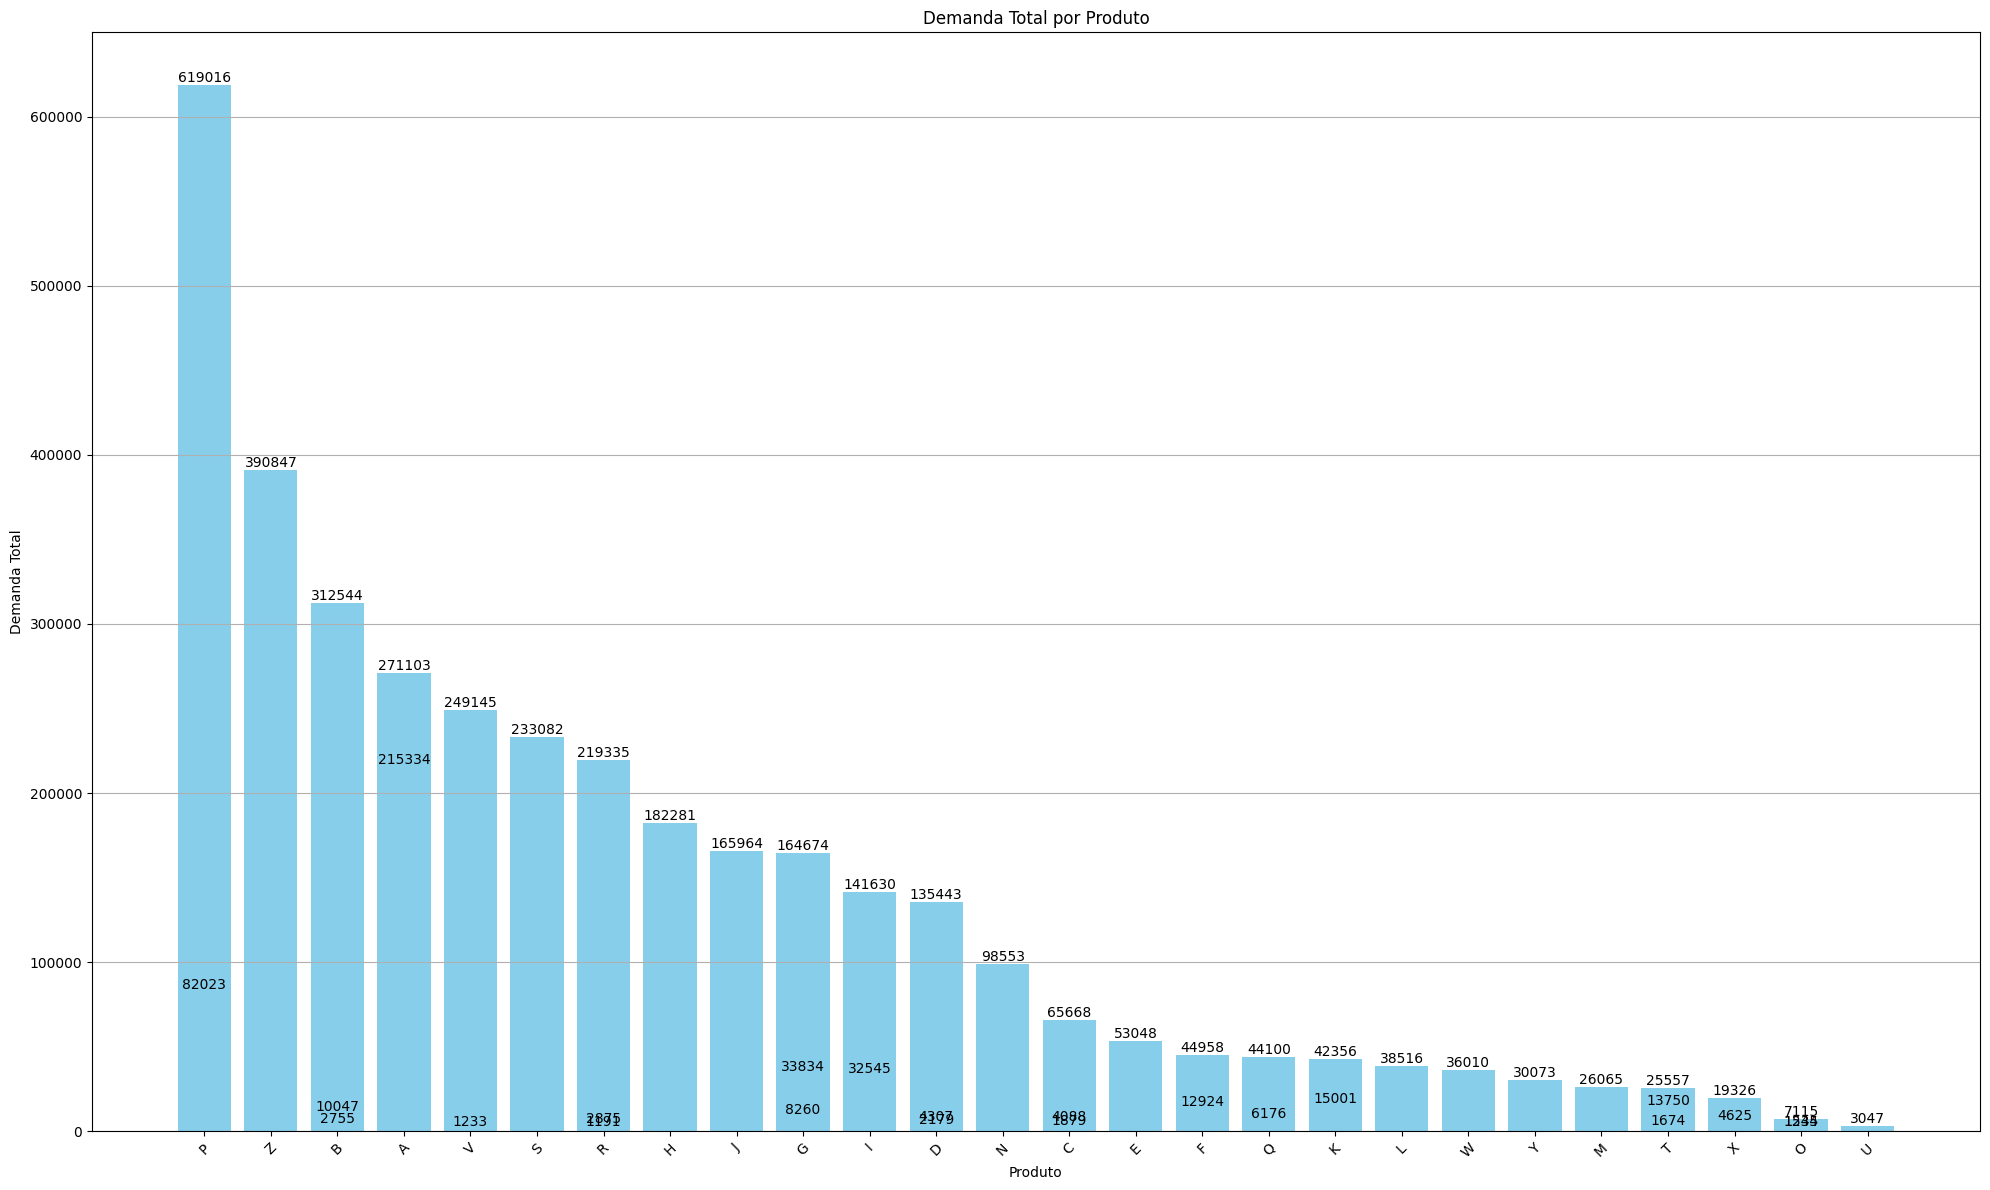

In [14]:
# Cria gráficos para produtos e categorias
df_plot = df_grouped_total.copy()

# Gráfico de Barras
plt.figure(figsize=(20, 12))
bars = plt.bar(df_plot['PRODUTO'], df_plot['DEMANDA_TOTAL'], color='skyblue')
plt.xlabel('Produto')
plt.ylabel('Demanda Total')
plt.title('Demanda Total por Produto')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adiciona rótulos nas barras do gráfico
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom')

plt.tight_layout()
plt.show()

O gráfico de barras acima mostra a Demanda Total por Produto agrupada por categoria e produto, com base no período de MAR22 a MAR24. Cada barra representa um produto, e a altura da barra indica o total de unidades demandadas para aquele produto ao longo dos meses considerados.

**O produto com a maior demanda total é o Produto P, com uma demanda total de 619.016 unidades no período de MAR22 a MAR24.**

In [15]:
# Filtra os dados para o Produto 'P'
df_produto_p = df[df['PRODUTO'] == 'P']

# Exibe as primeiras linhas para confirmar o filtro
df_produto_p.head()

,CATEGORIA,PRODUTO,FORNECEDOR,COMPRADOR,CENTROS DE DISTRIBUICAO,DESCRICAO,QTD DE CAIXAS,MAR22,ABR22,MAI22,...,JUN23,JUL23,AGO23,SET23,OUT23,NOV23,DEZ23,JAN24,FEV24,MAR24
17,B,P,L,A,N,R,132,74,95,132,...,99,162,152,140,82,102,143,143,113,90
24,B,P,L,A,J,Y,155,2150,104,1938,...,1227,1544,1063,199,1492,1885,1969,1206,586,557
48,B,P,L,A,Y,W,206,30,95,13,...,92,93,13,85,22,37,63,151,68,53
56,B,P,L,A,J,E,147,1890,1331,3865,...,1767,1816,2381,1051,1711,1616,1132,1480,716,970
60,B,P,L,A,B,I,55,96,239,5,...,67,29,130,69,41,83,90,75,23,91


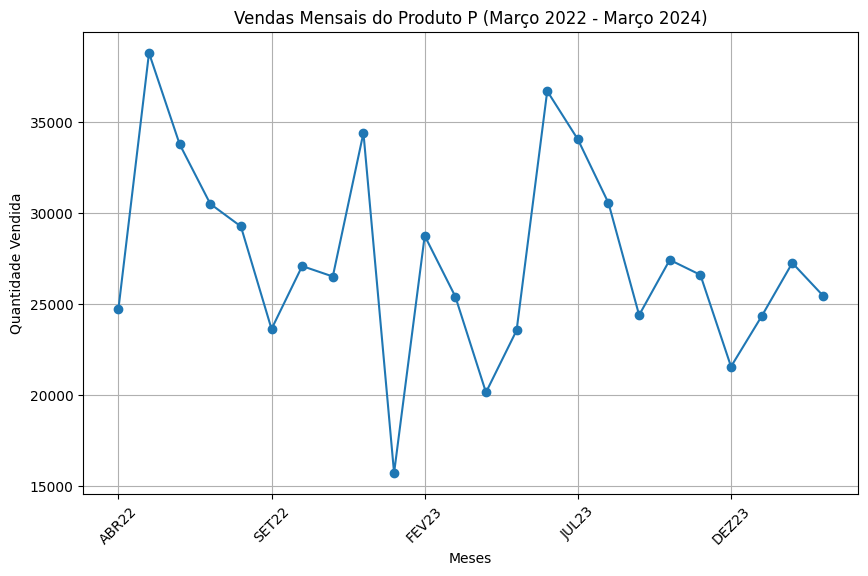

In [16]:
# Remove as colunas categóricas para focar nos dados de vendas mensais
df_vendas_p = df_produto_p.iloc[:, 8:]  # Colunas a partir de MAR22

# Soma as vendas mensais para o produto P
vendas_totais_p = df_vendas_p.sum()

# Cria um gráfico de linha para visualizar a tendência das vendas mensais
plt.figure(figsize=(10,6))
vendas_totais_p.plot(kind='line', marker='o')
plt.title('Vendas Mensais do Produto P (Março 2022 - Março 2024)')
plt.xlabel('Meses')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<a id="verificar-tabela-demanda"></a>
## 1.12 Verificar a Tabela de Demanda por Categoria e Produto
[Voltar ao Índice](#indice)




Precisamos verificar a tabela que agrupa a demanda total por categoria e produto para identificar se um produto aparece em várias categorias.

In [17]:
# Verifica a tabela de demanda por categoria e produto
df_product_category = df.groupby(['CATEGORIA', 'PRODUTO'])[monthly_columns].sum()

# Reseta o índice para facilitar a visualização
df_product_category = df_product_category.reset_index()

# Conta quantas vezes cada produto aparece e em quais categorias
product_counts = df_product_category['PRODUTO'].value_counts()

# Exibe os produtos que aparecem mais de uma vez
duplicated_products = product_counts[product_counts > 1]

# Exibe as informações
duplicated_products, df_product_category[df_product_category['PRODUTO'].isin(duplicated_products.index)]



(PRODUTO
 T    3
 C    3
 D    3
 B    3
 G    3
 O    3
 R    3
 A    2
 V    2
 X    2
 Q    2
 P    2
 K    2
 I    2
 F    2
 Name: count, dtype: int64,
    CATEGORIA PRODUTO  MAR22  ABR22  MAI22  JUN22  JUL22  AGO22  SET22  OUT22  \
 0          A       A   7068   5904   8467   9784   7743  10009   8804   9139   
 1          A       B    138     79    145    154     80    109     10     44   
 2          A       C    100     50    100     64     37     42     22     59   
 3          A       D   3048   4014   4406   3198   3683   5784   5503   5152   
 4          A       F    433    276     96    228    307    340    245    352   
 5          A       I   4649   5160   8122   4703   5368   7913   4319   3733   
 6          A       K    526    484    774    568    584    523    533    625   
 7          A       O     41     95      6     21     71     49     57     31   
 8          A       R   9514   8031   9193  11733   8418   9271   8390   7050   
 10         A       T    443    6

<b> Análise dos Produtos Duplicados</b>

Os resultados mostram que vários produtos aparecem mais de uma vez na tabela, indicando que eles estão associados a diferentes categorias. Aqui estão os detalhes:

Produtos Duplicados
Os produtos que aparecem mais de uma vez são:

- **T, C, D, B, G, O, R**: 3 vezes cada
- **A, V, X, Q, P, K, I, F**: 2 vezes cada

Razões para Múltiplas Ocorrências
1. **Diferentes Categorias**:
   - Os produtos estão listados em diferentes categorias, o que é esperado. Por exemplo, um produto pode ser vendido em mais de uma categoria, refletindo a sua versatilidade ou diferentes variações (como cores ou tamanhos).

2. **Variações do Produto**:
   - Cada ocorrência pode representar uma versão ou tipo do mesmo produto que é classificado em categorias distintas.

Implicações
- **Estratégias de Vendas**: Isso sugere que a gestão de estoque e as estratégias de marketing podem ser adaptadas com base nas categorias em que cada produto está presente.
- **Foco em Vendas**: Produtos que estão presentes em várias categorias podem ser priorizados em campanhas promocionais, aproveitando seu apelo em diferentes segmentos de mercado.


<a id="grafico-demanda-categoria"></a>
## 1.13 Gráfico Demanda por categoria
[Voltar ao Índice](#indice)


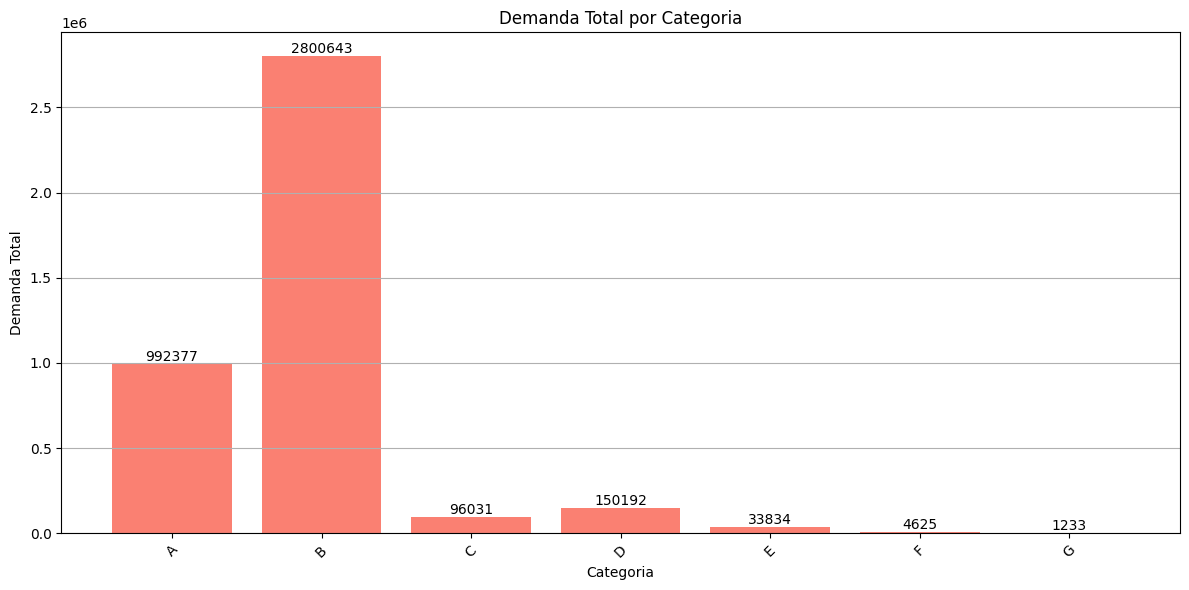

In [18]:
# Gráfico de Barras para Categorias com rótulos
# Agrupa por CATEGORIA e soma a demanda total
df_category_total = df_grouped_total.groupby('CATEGORIA')['DEMANDA_TOTAL'].sum().reset_index()

# Cria o gráfico
plt.figure(figsize=(12, 6))
category_bars = plt.bar(df_category_total['CATEGORIA'], df_category_total['DEMANDA_TOTAL'], color='salmon')
plt.xlabel('Categoria')
plt.ylabel('Demanda Total')
plt.title('Demanda Total por Categoria')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adiciona rótulos nas barras do gráfico
for bar in category_bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom')
# Exibe o gráfico
plt.tight_layout()
plt.show()

Gráfico de Barras para Categorias: Este gráfico mostra a demanda total por categoria, agrupando todos os produtos dentro de cada categoria.
Observações:
As categorias estão rotuladas no eixo x, enquanto a demanda total é representada no eixo y.
Este gráfico permite identificar rapidamente qual categoria está liderando em termos de vendas, ajudando na análise de desempenho.

<a id="verifica-produtos-categorias"></a>
## 1.14 Verificação de Produtos nas Categorias
[Voltar ao Índice](#indice)


In [19]:
# Verifica os produtos que aparecem em mais de uma categoria
duplicated_products = df_grouped_total[df_grouped_total.duplicated(subset=['PRODUTO'], keep=False)]

# Exibe os produtos duplicados, mostrando suas categorias e demandas totais
print(duplicated_products)


   CATEGORIA PRODUTO  DEMANDA_TOTAL
24         B       P         619016
12         B       B         312544
11         B       A         271103
29         B       V         249145
8          A       R         219335
0          A       A         215334
16         B       G         164674
5          A       I         141630
3          A       D         135443
42         D       P          82023
13         B       C          65668
35         C       F          44958
43         D       Q          44100
36         C       K          42356
45         E       G          33834
18         B       I          32545
27         B       T          25557
31         B       X          19326
6          A       K          15001
10         A       T          13750
4          A       F          12924
39         D       B          10047
41         D       G           8260
23         B       O           7115
25         B       Q           6176
46         F       X           4625
34         C       D        

<b>Produtos Duplicados e Suas Categorias:</b>

1. **Produto P**:
   - Categoria **B**: Demanda total de 619,016
   - Categoria **D**: Demanda total de 82,023

2. **Produto B**:
   - Categoria **B**: Demanda total de 312,544
   - Categoria **D**: Demanda total de 10,047
   - Categoria **A**: Demanda total de 2,755

3. **Produto A**:
   - Categoria **B**: Demanda total de 271,103
   - Categoria **A**: Demanda total de 215,334

4. **Produto G**:
   - Categoria **B**: Demanda total de 164,674
   - Categoria **D**: Demanda total de 8,260
   - Categoria **E**: Demanda total de 33,834

5. **Produto I**:
   - Categoria **B**: Demanda total de 32,545
   - Categoria **A**: Demanda total de 141,630

6. **Produto D**:
   - Categoria **A**: Demanda total de 135,443
   - Categoria **B**: Demanda total de 2,179
   - Categoria **C**: Demanda total de 4,307

7. **Produto T**:
   - Categoria **B**: Demanda total de 25,557
   - Categoria **D**: Demanda total de 1,674

8. **Produto C**:
   - Categoria **B**: Demanda total de 65,668
   - Categoria **D**: Demanda total de 4,088
   - Categoria **A**: Demanda total de 1,879

9. **Produto O**:
   - Categoria **B**: Demanda total de 7,115
   - Categoria **C**: Demanda total de 1,535
   - Categoria **A**: Demanda total de 1,244

10. **Produto R**:
    - Categoria **A**: Demanda total de 219,335
    - Categoria **B**: Demanda total de 1,191
    - Categoria **C**: Demanda total de 2,875

11. **Produto Q**:
    - Categoria **B**: Demanda total de 6,176
    - Categoria **D**: Demanda total de 44,100

12. **Produto V**:
    - Categoria **B**: Demanda total de 249,145
    - Categoria **G**: Demanda total de 1,233

13. **Produto X**:
    - Categoria **B**: Demanda total de 19,326
    - Categoria **F**: Demanda total de 4,625


<a id="tabela-produtos-categoria"></a>
## 1.15 Tabela Produtos por Categoria
[Voltar ao Índice](#indice)


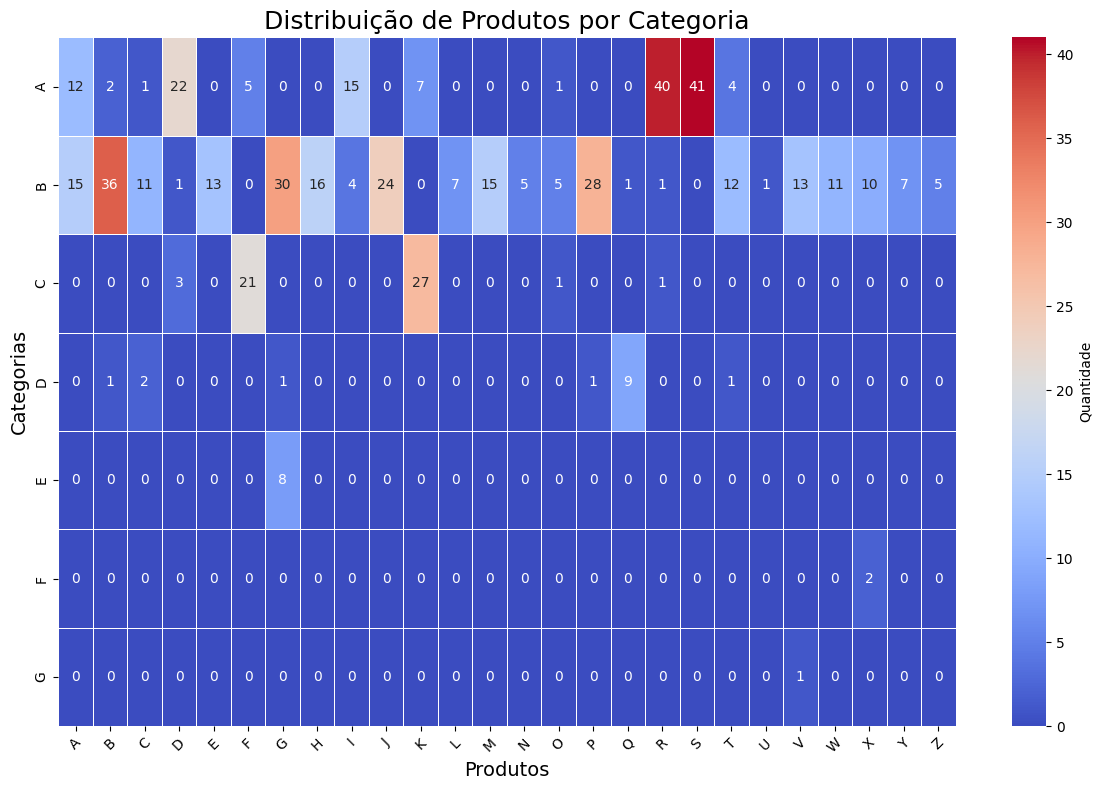

In [20]:
# Cria uma tabela para a distribuição de produtos por categoria
# Conta quantos produtos pertence em cada categoria
top_products_per_category = df.groupby('CATEGORIA')['PRODUTO'].value_counts().unstack(fill_value=0)

# Heatmap para visualizar os produtos mais comuns em cada categoria
plt.figure(figsize=(12, 8))
sns.heatmap(top_products_per_category, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Quantidade'})

# Títulos e rótulos personalizados
plt.title('Distribuição de Produtos por Categoria', fontsize=18)
plt.xlabel('Produtos', fontsize=14)
plt.ylabel('Categorias', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
#exibe o gráfico
plt.show()


Heatmap - Distribuição de Produtos por Categoria: Dá pra visualizar a distribuição de produtos dentro de cada categoria. Isso facilita a identificação de quais produtos são mais frequentes em cada categoria.

<a id="grafico-fornecedores-centros-distribuição"></a>
## 1.16 Gráfico Fornecedores e Centros de Distribuição
[Voltar ao Índice](#indice)


C:\Users\Usuário\AppData\Local\Temp\ipykernel_15380\1425995072.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fornecedor_cd_count.index, y=fornecedor_cd_count.values, palette="coolwarm")


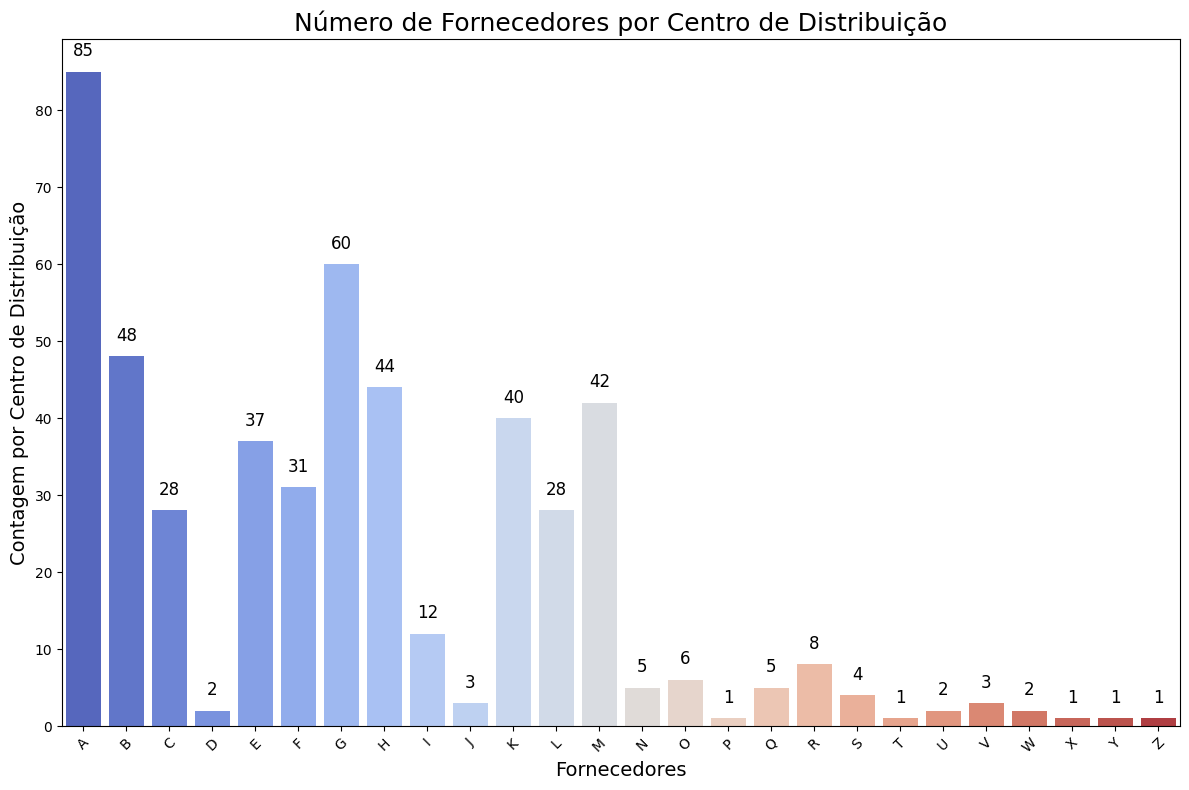

In [21]:
# Contagem de fornecedores por centro de distribuição
fornecedor_cd_count = df.groupby('FORNECEDOR')['CENTROS DE DISTRIBUICAO'].count()

# Fornecedores mais comuns em cada centro de distribuição
top_fornecedores_per_cd = df.groupby(['CENTROS DE DISTRIBUICAO', 'FORNECEDOR']).size().unstack(fill_value=0)
#Cria o gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x=fornecedor_cd_count.index, y=fornecedor_cd_count.values, palette="coolwarm")
plt.title('Número de Fornecedores por Centro de Distribuição', fontsize=18)
plt.xlabel('Fornecedores', fontsize=14)
plt.ylabel('Contagem por Centro de Distribuição', fontsize=14)
plt.xticks(rotation=45)

# Adiciona rótulos em cima das barras do gráfico
for i, val in enumerate(fornecedor_cd_count.values):
    plt.text(i, val + 2, str(val), ha='center', fontsize=12)
# Exibe o gráfico
plt.tight_layout()
plt.show()

Gráfico de Barras - Número de Fornecedores por Centro de Distribuição: O gráfico mostra quantos centros de distribuição estão associados a cada fornecedor. Alguns fornecedores estão fortemente associados a múltiplos centros, enquanto outros têm menor participação.

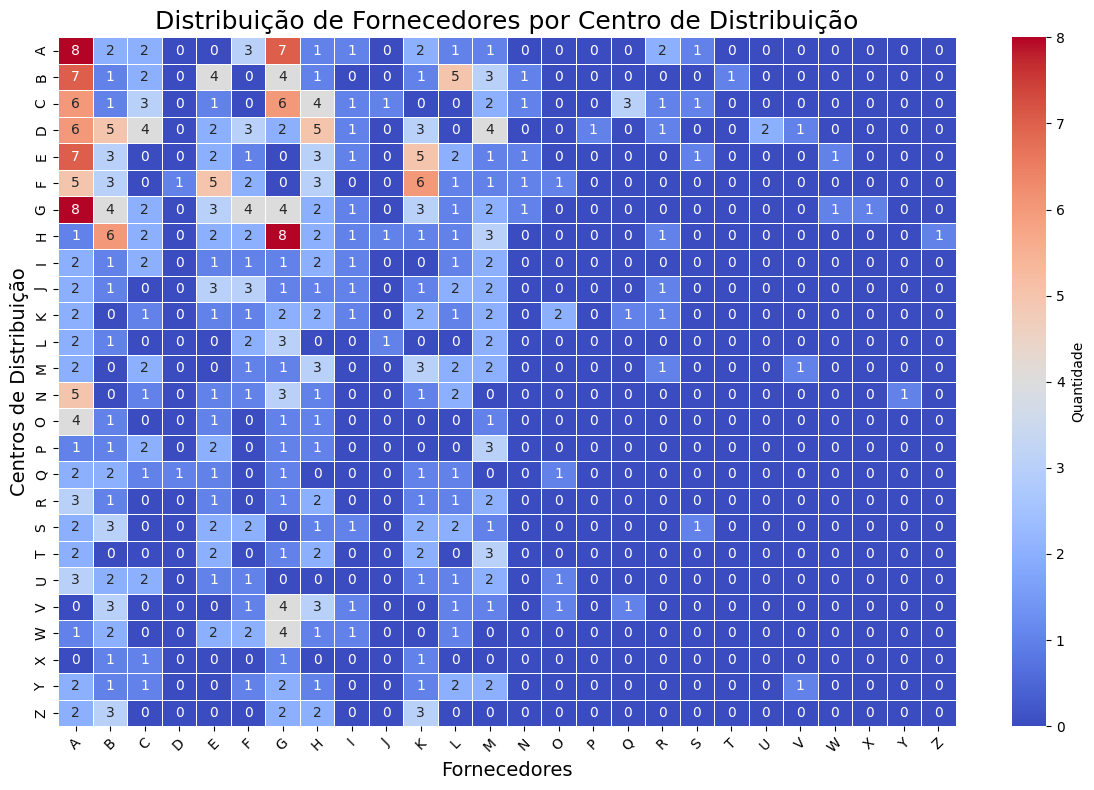

In [22]:
# Heatmap para visualizar os fornecedores mais comuns em cada centro de distribuição
plt.figure(figsize=(12, 8))
sns.heatmap(top_fornecedores_per_cd, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Quantidade'})

# Títulos e rótulos personalizados
plt.title('Distribuição de Fornecedores por Centro de Distribuição', fontsize=18)
plt.xlabel('Fornecedores', fontsize=14)
plt.ylabel('Centros de Distribuição', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
# exibe o gráfico
plt.show()

Heatmap - Distribuição de Fornecedores por Centro de Distribuição: mostra a concentração de fornecedores em cada centro de distribuição, ajudando a identificar quais fornecedores são mais comuns em determinados centros.

<a id="grafico-compradores"></a>
## 1.17 Gráfico dos Compradores
[Voltar ao Índice](#indice)


C:\Users\Usuário\AppData\Local\Temp\ipykernel_15380\4279385137.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comprador_count.index, y=comprador_count.values, palette="coolwarm")


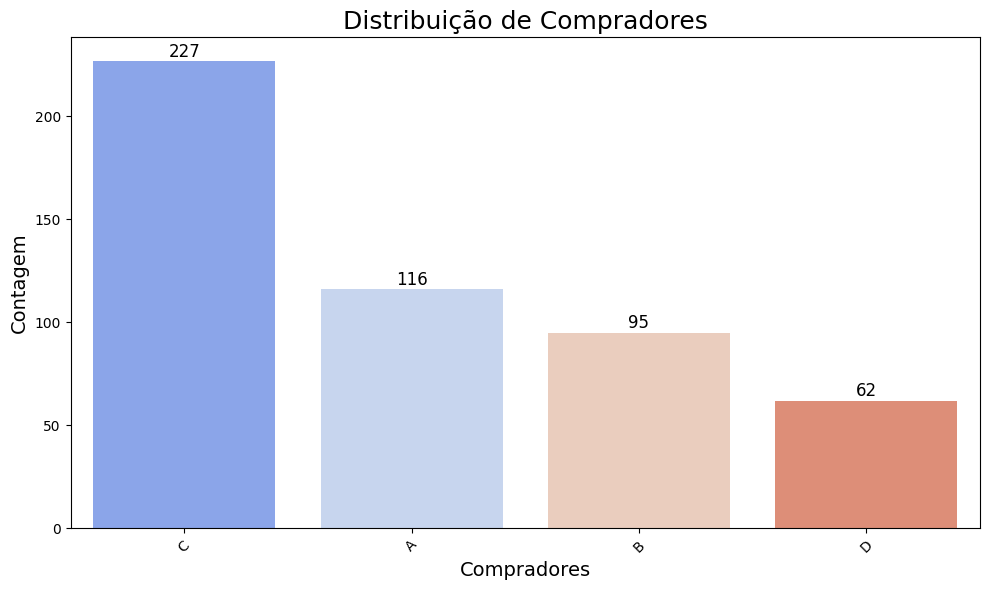

In [23]:
# Contagem de compradores
comprador_count = df['COMPRADOR'].value_counts()

# Analisa os produtos mais comprados por cada comprador
top_products_per_comprador = df.groupby(['COMPRADOR', 'PRODUTO']).size().unstack(fill_value=0)

# Gráfico de Barras - Distribuição de Compradores
plt.figure(figsize=(10, 6))
sns.barplot(x=comprador_count.index, y=comprador_count.values, palette="coolwarm")
plt.title('Distribuição de Compradores', fontsize=18)
plt.xlabel('Compradores', fontsize=14)
plt.ylabel('Contagem', fontsize=14)
plt.xticks(rotation=45)

# Adiciona rótulos em cima das barras
for i, val in enumerate(comprador_count.values):
    plt.text(i, val + 2, str(val), ha='center', fontsize=12)
# Exibe o gráfico
plt.tight_layout()
plt.show()

Gráfico de Barras - Distribuição de Compradores: a maioria das compras está concentrada em um número reduzido de compradores, sendo o comprador C o mais representativo, depois pelos compradores A, B, e D.

<a id="grafico-produtos-comprador"></a>
## 1.18 Gráfico Produtos por Comprador
[Voltar ao Índice](#indice)


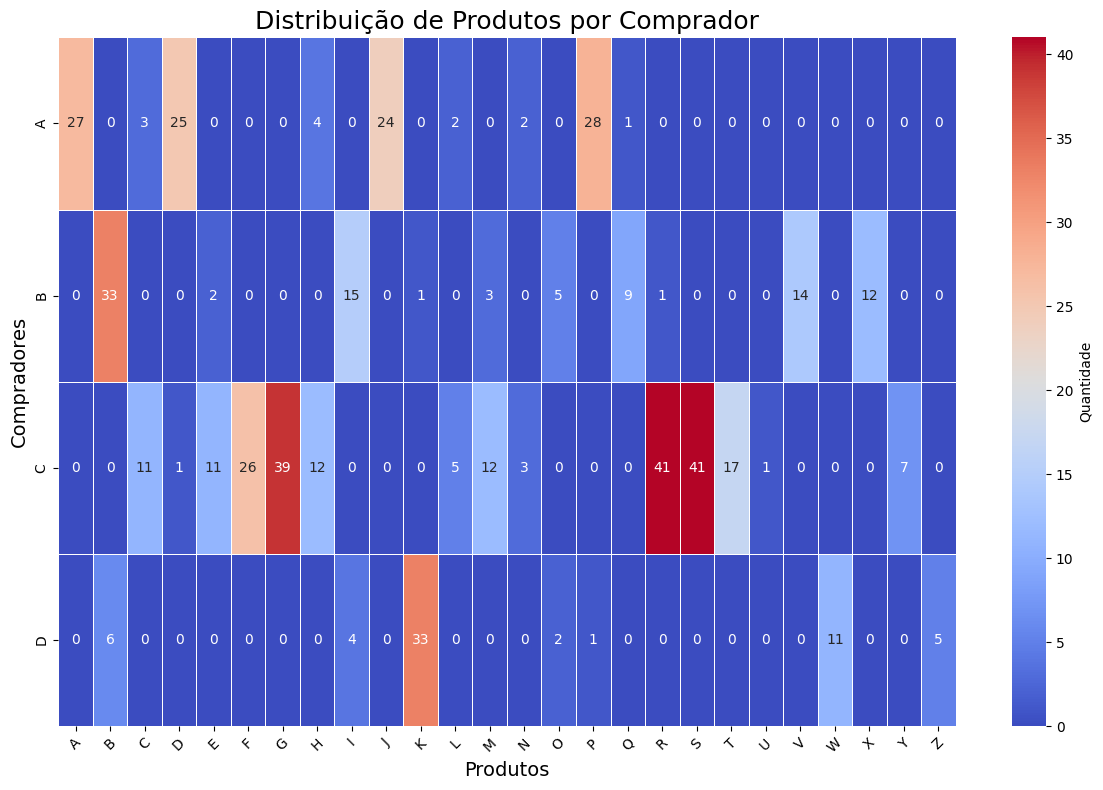

In [24]:
# Heatmap para visualizar os produtos mais comprados por cada comprador
plt.figure(figsize=(12, 8))
sns.heatmap(top_products_per_comprador, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5, cbar_kws={'label': 'Quantidade'})

# Títulos e rótulos personalizados
plt.title('Distribuição de Produtos por Comprador', fontsize=18)
plt.xlabel('Produtos', fontsize=14)
plt.ylabel('Compradores', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
# Exibe o gráfico
plt.show()

Heatmap - Distribuição de Produtos por Comprador: dá pra  visualizar quais produtos são mais adquiridos por cada comprador, mostrando a diversidade de produtos entre os compradores.

<a id="estatisticas-descritivas-numéricas"></a>
## 1.19 Estatística Descritivas para as variáveis numéricas
[Voltar ao Índice](#indice)



In [25]:
# Estatística Descritivas para as variáveis numéricas
numeric_summary = df_melted.describe()

# Contagem de valores únicos para variáveis categóricas
categorical_columns = ['CATEGORIA', 'PRODUTO', 'FORNECEDOR', 'COMPRADOR', 'CENTROS DE DISTRIBUICAO']
categorical_summary = {col: df_melted[col].nunique() for col in categorical_columns}

# Exibe os resultados
numeric_summary, categorical_summary

(       QTD DE CAIXAS                 DATA        VENDA
 count   12500.000000                12500  12500.00000
 mean      104.142000  2023-03-02 00:57:36     99.88576
 min         7.000000  2022-03-01 00:00:00    -38.00000
 25%        62.000000  2022-09-01 00:00:00     51.00000
 50%        92.000000  2023-03-01 00:00:00     88.25000
 75%       125.250000  2023-09-01 00:00:00    109.00000
 max      1059.000000  2024-03-01 00:00:00    421.00000
 std        80.749288                  NaN     79.55154,
 {'CATEGORIA': 7,
  'PRODUTO': 26,
  'FORNECEDOR': 26,
  'COMPRADOR': 4,
  'CENTROS DE DISTRIBUICAO': 26})

<b>Estatísticas Descritivas (Variáveis Numéricas)</b>

**QTD DE CAIXAS**:
   - **count**: 12.500 observações, ou seja, 12.500 registros de quantidade de caixas vendidas.
   - **mean (média)**: 104,14 caixas por registro.
   - **std (desvio padrão)**: 80,75, indicando que há uma variação considerável no número de caixas vendidas por transação.
   - **min (mínimo)**: O menor valor registrado é 7 caixas.
   - **25% (primeiro quartil)**: 25% dos registros possuem 62 caixas ou menos.
   - **50% (mediana)**: A mediana é de 92 caixas, o que significa que metade das transações envolve menos de 92 caixas.
   - **75% (terceiro quartil)**: 75% das transações têm até 125 caixas.
   - **max (máximo)**: O maior número de caixas em um único registro é 1.059 caixas.

**VENDA**:
   - **count**: 12.500 registros de valores.
   - **mean (média)**: O valor médio é 99,89.
   - **std (desvio padrão)**: 79,55, indicando variação significativa nos valores.
   - **min (mínimo)**: Existe um valor negativo de -38, sugerindo possivelmente reembolsos ou ajustes.
   - **25% (primeiro quartil)**: 25% dos valores estão abaixo de 51.
   - **50% (mediana)**: O valor mediano é 88,25.
   - **75% (terceiro quartil)**: 75% dos valores são inferiores a 109.
   - **max (máximo)**: O valor máximo registrado é 421.

<b>Contagem de Valores Únicos (Variáveis Categóricas)</b>

1. **CATEGORIA**: Existem 7 categorias distintas no dataset.
2. **PRODUTO**: Há 26 produtos diferentes.
3. **FORNECEDOR**: Existem 26 fornecedores distintos.
4. **COMPRADOR**: Apenas 4 compradores diferentes estão registrados.
5. **CENTROS DE DISTRIBUICAO**: Existem 26 centros de distribuição diferentes.

<b>Observações:</b>
- **Valores negativos em "VENDA"**: Isso pode indicar a presença de devoluções ou correções financeiras. Seria interessante investigar esses valores para entender seu impacto.
- **Distribuição assimétrica**: A grande diferença entre o valor máximo e a média sugere uma distribuição assimétrica tanto para o número de caixas quanto para os valores. Pode ser interessante analisar mais a fundo a presença de outliers.
- **Pequeno número de compradores**: Apesar da diversidade de produtos, fornecedores e centros de distribuição, há um número relativamente pequeno de compradores. Dependendo do objetivo, isso pode influenciar as análises de demanda.


<a id="valores-negativos"></a>
## 1.20 Valores Negativos
[Voltar ao Índice](#indice)


In [26]:
# Identifica transações com valores negativos na coluna 'VENDA'
valores_negativos = df_melted[df_melted['VENDA'] < 0]

# Exibe um resumo das transações com valores negativos
print(f"Total de transações com valores negativos: {valores_negativos.shape[0]}")
print("Estatísticas descritivas das transações com valores negativos:")
print(valores_negativos.describe())

# Verifica a distribuição dos valores negativos por categoria, produto, etc.
print("\nDistribuição de valores negativos por produto:")
print(valores_negativos['PRODUTO'].value_counts())

print("\nDistribuição de valores negativos por fornecedor:")
print(valores_negativos['FORNECEDOR'].value_counts())

# Se decidirmos remover ou tratar os valores negativos (por exemplo, removê-los):
df_melted_sem_negativos = df_melted[df_melted['VENDA'] >= 0]

# Exibe um resumo do dataset sem os valores negativos
print("\nResumo do dataset após remoção de valores negativos:")
print(df_melted_sem_negativos.describe())

# Estatísticas descritivas para as variáveis numéricas após o tratamento
numeric_summary = df_melted_sem_negativos.describe()

# Contagem de valores únicos para variáveis categóricas
categorical_columns = ['CATEGORIA', 'PRODUTO', 'FORNECEDOR', 'COMPRADOR', 'CENTROS DE DISTRIBUICAO']
categorical_summary = {col: df_melted_sem_negativos[col].nunique() for col in categorical_columns}

# Exibe os resultados finais
numeric_summary, categorical_summary



Total de transações com valores negativos: 4
Estatísticas descritivas das transações com valores negativos:
       QTD DE CAIXAS                 DATA      VENDA
count       4.000000                    4   4.000000
mean       69.250000  2022-12-30 18:00:00 -18.250000
min        26.000000  2022-07-01 00:00:00 -38.000000
25%        47.000000  2022-10-23 18:00:00 -26.000000
50%        60.000000  2023-01-30 12:00:00 -16.000000
75%        82.250000  2023-04-08 12:00:00  -8.250000
max       131.000000  2023-05-01 00:00:00  -3.000000
std        44.447535                  NaN  15.326991

Distribuição de valores negativos por produto:
PRODUTO
V    1
K    1
J    1
G    1
Name: count, dtype: int64

Distribuição de valores negativos por fornecedor:
FORNECEDOR
K    1
H    1
A    1
F    1
Name: count, dtype: int64

Resumo do dataset após remoção de valores negativos:
       QTD DE CAIXAS                           DATA         VENDA
count   12496.000000                          12496  12496.000000
mea

(       QTD DE CAIXAS                           DATA         VENDA
 count   12496.000000                          12496  12496.000000
 mean      104.153169  2023-03-02 01:25:51.088348160     99.923576
 min         7.000000            2022-03-01 00:00:00      1.000000
 25%        62.000000            2022-09-01 00:00:00     51.000000
 50%        92.000000            2023-03-01 00:00:00     88.500000
 75%       125.250000            2023-09-01 00:00:00    109.250000
 max      1059.000000            2024-03-01 00:00:00    421.000000
 std        80.756861                            NaN     79.535827,
 {'CATEGORIA': 7,
  'PRODUTO': 26,
  'FORNECEDOR': 26,
  'COMPRADOR': 4,
  'CENTROS DE DISTRIBUICAO': 26})

<b>Total de transações com valores negativos:</b>
- Foram identificadas 4 transações com valores negativos na coluna **VENDA**.

<b>Estatísticas descritivas dos valores negativos:</b>
**QTD DE CAIXAS**:
  - As transações com valores negativos envolvem uma média de 69,25 caixas, com uma variação significativa (desvio padrão) de 44,45.
  - A menor quantidade foi de 26 caixas, e a maior foi de 131 caixas.
**VENDA**:
  - Os valores de vendas negativos variam de -38 até -3, com uma média de -18,25.

<b>Distribuição de valores negativos por produto:</b>
- Cada produto entre "V", "K", "J" e "G" possui uma transação com valores negativos.

<b>Distribuição de valores negativos por fornecedor:</b>
- Cada fornecedor entre "K", "H", "A" e "F" tem uma transação associada a valores negativos.

<b>Resumo do dataset após remoção dos valores negativos:</b>
**QTD DE CAIXAS**:
  - Após a remoção dos valores negativos, a média de caixas vendidas permaneceu praticamente a mesma (104,15).
  - O mínimo é de 7 caixas, e o máximo é de 1.059 caixas.
**VENDA**:
  - A média de venda é de 99,92, com valores variando de 1 a 421.

<b>Conclusão:</b>
A análise mostra que os valores negativos são raros (apenas 4 transações) e não estão concentrados em um único produto ou fornecedor. Se esses valores negativos representarem devoluções ou ajustes legítimos.



<a id="modelagem---arima-e-xgboost"></a>
## 2. Modelagem - ARIMA e XGBoost


<a id="modelagem---arima-top-down-com-validação-cruzada"></a>
## 2.1 Modelagem - ARIMA Top-Down com Validação Cruzada
- Previsão para os próximos 12 meses

[Voltar ao Índice](#indice)




In [27]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [28]:
# Importando as bibliotecas
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from pmdarima import auto_arima

# Função para calcular MAPE com filtragem de zeros
def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0  # Filtrar valores reais que são zero
    return (abs((y_true[mask] - y_pred[mask]) / y_true[mask])).mean() * 100

# Função para calcular WMAPE com filtragem de zeros
def weighted_mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0  # Filtrar valores reais que são zero
    return sum(abs(y_true[mask] - y_pred[mask])) / sum(y_true[mask]) * 100

# Carregar o dataset
df = pd.read_csv('df_case_1_-_500_linhas.csv')

# Transforma o dataset para o formato longo
df_melted = pd.melt(df,
                    id_vars=['CATEGORIA', 'PRODUTO', 'FORNECEDOR', 'COMPRADOR', 'CENTROS DE DISTRIBUICAO', 'DESCRICAO', 'QTD DE CAIXAS'],
                    var_name='DATA',
                    value_name='VENDA')

# Calcular os quartis e o IQR para a coluna 'VENDA'
Q1 = df_melted['VENDA'].quantile(0.25)
Q3 = df_melted['VENDA'].quantile(0.75)
IQR = Q3 - Q1

# Define os limites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Substitui os outliers pela mediana
mediana = df_melted['VENDA'].median()
df_melted['VENDA'] = df_melted['VENDA'].apply(lambda x: mediana if (x < limite_inferior or x > limite_superior) else x)

# Agrega os dados no nível mais alto (exemplo: por categoria ou centro de distribuição)
df_aggregated = df_melted.groupby(['DATA'])['VENDA'].sum()

# Configuração para validação cruzada com Time Series Split
tscv = TimeSeriesSplit(n_splits=5)

# Usa auto_arima para encontrar os melhores parâmetros com Time Series Split
auto_arima_model = auto_arima(df_aggregated,
                              seasonal=False,
                              trace=True,
                              error_action='ignore',
                              suppress_warnings=True,
                              stepwise=True,
                              cv=tscv)

# Exibe o resumo do modelo ajustado
print(auto_arima_model.summary())

# Faz a previsão da demanda para os próximos 12 meses
forecast = auto_arima_model.predict(n_periods=12)

# Redefine o índice das previsões
forecast = pd.Series(forecast).reset_index(drop=True)

# Distribui a previsão Top-Down para os níveis inferiores usando informações históricas de venda
proportions = df_melted.groupby(['PRODUTO'])['VENDA'].sum() / df_melted['VENDA'].sum()

# Aplica as proporções e as previsões
forecast_disaggregated = pd.DataFrame()
for produto, proporcao in proportions.items():
    forecast_disaggregated[produto] = forecast * proporcao

# Exibe as previsões desagregadas para cada produto
print(forecast_disaggregated)

# Calcula as métricas de erro usando os últimos 12 valores reais
real_values = df_aggregated[-12:].reset_index(drop=True)
forecast_values = forecast

# Metricas de erros para avaliação
mae = mean_absolute_error(real_values, forecast_values)
mse = mean_squared_error(real_values, forecast_values)
rmse = mean_squared_error(real_values, forecast_values, squared=False)
mape = mean_absolute_percentage_error(real_values, forecast_values)
wmape = weighted_mean_absolute_percentage_error(real_values, forecast_values)

# Exibe as métricas de erro
print(f"\nMétricas de Erro:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}%\nWMAPE: {wmape}%")


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=474.186, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=613.942, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=600.475, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=476.895, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=474.354, Time=0.06 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=476.854, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=476.654, Time=0.07 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=478.566, Time=0.06 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=477.949, Time=0.07 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=479.822, Time=0.06 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=475.292, Time=0.09 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=465.732, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=463.728, Time=0.02 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=465.178, 

C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<a id="modelagem---arima-top-down-com-ajuste-pdq"></a>
## 2.2 Modelagem - ARIMA Top-Down com Ajute p,d,q

- Previsão para os próximos 12 meses

[Voltar ao Índice](#indice)



In [29]:
# Importando as bibliotecas para o modelo
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Função para calcular MAPE com filtragem de zeros
def mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0  # Filtrar valores reais que são zero
    return (abs((y_true[mask] - y_pred[mask]) / y_true[mask])).mean() * 100

# Função para calcular WMAPE com filtragem de zeros
def weighted_mean_absolute_percentage_error(y_true, y_pred):
    mask = y_true != 0  # Filtrar valores reais que são zero
    return sum(abs(y_true[mask] - y_pred[mask])) / sum(y_true[mask]) * 100

# Carregar o dataset
df = pd.read_csv('df_case_1_-_500_linhas.csv')

# Transforma o dataset para o formato longo
df_melted = pd.melt(df,
                    id_vars=['CATEGORIA', 'PRODUTO', 'FORNECEDOR', 'COMPRADOR', 'CENTROS DE DISTRIBUICAO', 'DESCRICAO', 'QTD DE CAIXAS'],
                    var_name='DATA',
                    value_name='VENDA')

# Calcula os quartis e o IQR para a coluna 'VENDA'
Q1 = df_melted['VENDA'].quantile(0.25)
Q3 = df_melted['VENDA'].quantile(0.75)
IQR = Q3 - Q1

# Define os limites para detectar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Substitui os outliers pela mediana
mediana = df_melted['VENDA'].median()
df_melted['VENDA'] = df_melted['VENDA'].apply(lambda x: mediana if (x < limite_inferior or x > limite_superior) else x)

# Agrega os dados no nível mais alto (exemplo: por categoria ou centro de distribuição)
df_aggregated = df_melted.groupby(['DATA'])['VENDA'].sum()

# Ajusta o modelo ARIMA usando p,d,q
model = ARIMA(df_aggregated, order=(2, 1, 2))
arima_model = model.fit()

# Exibe o resumo do modelo ajustado
print(arima_model.summary())

# Faz a previsão para os próximos 12 meses
forecast = arima_model.forecast(steps=12)

# Vai redefinir o índice das previsões
forecast = pd.Series(forecast).reset_index(drop=True)

# Distribui a previsão Top-Down para os níveis inferiores usando proporções históricas
proportions = df_melted.groupby(['PRODUTO'])['VENDA'].sum() / df_melted['VENDA'].sum()

# Aplica as proporções e as previsões
forecast_disaggregated = pd.DataFrame()
for produto, proporcao in proportions.items():
    forecast_disaggregated[produto] = forecast * proporcao

# Exibe as previsões desagregadas para cada produto
print(forecast_disaggregated)

# Calcula as métricas de erro usando os últimos 12 valores reais
real_values = df_aggregated[-12:].reset_index(drop=True)
forecast_values = forecast

# Metricas de erro para avaliação
mae = mean_absolute_error(real_values, forecast_values)
mse = mean_squared_error(real_values, forecast_values)
rmse = mean_squared_error(real_values, forecast_values, squared=False)
mape = mean_absolute_percentage_error(real_values, forecast_values)
wmape = weighted_mean_absolute_percentage_error(real_values, forecast_values)

# Exibe as métricas de erro
print(f"\nMétricas de Erro:\nMAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nMAPE: {mape}%\nWMAPE: {wmape}%")


C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packag

                               SARIMAX Results                                
Dep. Variable:                  VENDA   No. Observations:                   25
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -233.231
Date:                Sun, 20 Oct 2024   AIC                            476.463
Time:                        12:08:28   BIC                            482.353
Sample:                             0   HQIC                           478.026
                                 - 25                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0599   4.91e+04   1.22e-06      1.000   -9.63e+04    9.63e+04
ar.L2          0.9401   4.62e+04   2.04e-05      1.000   -9.05e+04    9.05e+04
ma.L1        2.03e-07   5.31e+04   3.82e-12      1.0

C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Análise**

Os resultados mostram que o ARIMA com Validação Cruzada apresentou melhor desempenho em todas as métricas, com erros mais baixos em relação ao ARIMA ajustado manualmente.

Isso indica que a abordagem com Validação Cruzada foi mais eficaz para encontrar os parâmetros ideais e fornecer previsões mais precisas.

<a id="modelagem---xgboost"></a>
## 2.3 Modelagem - XGBoost
- Protudo P
- Previsão para os próximos 12 meses

[Voltar ao Índice](#indice)

In [30]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [31]:
# Importar as bibliotecas
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

# Carrega o dataset
file_path = 'df_case_1_-_500_linhas.csv'
df = pd.read_csv(file_path)

# Filtra os dados para o Produto 'P'
df_produto_p = df[df['PRODUTO'] == 'P']

# Remove as colunas categóricas para focar nos dados de vendas mensais
df_vendas_p = df_produto_p.iloc[:, 8:]  # Colunas de MAR22 até MAR24

# Soma as vendas mensais para o produto P
vendas_totais_p = df_vendas_p.sum()

# Prepara a série de vendas como univariada (soma das vendas totais por mês)
vendas_p_series = vendas_totais_p.values

# Cria lags para a série temporal
def create_lagged_features(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Define o número de lags
n_lags = 6
X, y = create_lagged_features(vendas_p_series, n_lags)

# Define o modelo XGBoost com hiperparâmetros padrão
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,  # Definindo 100 estimadores
    learning_rate=0.05,  # Taxa de aprendizado de 0.05
    max_depth=4,  # Definindo a profundidade máxima da árvore
    subsample=0.8,  # Subamostragem de 80%
    colsample_bytree=0.8  # Fração de amostragem por árvore
)

# Ajusta o modelo com os dados
xgb_model.fit(X, y)

# Faz a previsão dos próximos 12 meses (usando os últimos 6 meses como input)
last_6_months = vendas_p_series[-6:].reshape(1, -1)
xgb_forecast_12_months = []

for i in range(12):
    next_forecast = xgb_model.predict(last_6_months)
    xgb_forecast_12_months.append(next_forecast[0])
    # Atualiza o input para a próxima previsão
    last_6_months = np.append(last_6_months[:, 1:], next_forecast).reshape(1, -1)

# Exibe a previsão dos próximos 12 meses
print("Previsão XGBoost para os próximos 12 meses:")
print(xgb_forecast_12_months)

# Valores reais para os últimos 12 meses do dataset (para comparação)
valores_reais = vendas_p_series[-12:]

# Funções de cálculo de métricas
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def weighted_mean_absolute_percentage_error(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100

# Calcula as métricas para XGBoost
xgb_mae = mean_absolute_error(valores_reais, xgb_forecast_12_months)
xgb_mse = mean_squared_error(valores_reais, xgb_forecast_12_months)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mape = mean_absolute_percentage_error(valores_reais, xgb_forecast_12_months)
xgb_wmape = weighted_mean_absolute_percentage_error(valores_reais, xgb_forecast_12_months)

# Exibe as métricas de erro
print(f"MAE: {xgb_mae}")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"MAPE: {xgb_mape}")
print(f"WMAPE: {xgb_wmape}")

Previsão XGBoost para os próximos 12 meses:
[25825.96, 22595.703, 27602.344, 30086.377, 26493.15, 24566.412, 25491.201, 26471.71, 25195.17, 28058.385, 27159.639, 26167.932]
MAE: 2851.9778645833335
MSE: 15016209.92464447
RMSE: 3875.0754734126754
MAPE: 10.477286589654282
WMAPE: 10.625585049737959


<a id="modelagem---xgboost-validação-cruzada-e-fine-tuning"></a>
## 2.4 Modelagem - XGBoost validação cruzada e Fine-Tuning
- Protudo P
- Previsão para os próximos 12 meses

[Voltar ao Índice](#indice)

In [32]:
# Importando as bibliotecas
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor

# Carrega o dataset
file_path = 'df_case_1_-_500_linhas.csv'  # Altere o caminho se necessário
df = pd.read_csv(file_path)

# Filtra os dados para o Produto 'P'
df_produto_p = df[df['PRODUTO'] == 'P']

# Remove as colunas categóricas para focar nos dados de vendas mensais
df_vendas_p = df_produto_p.iloc[:, 8:]  # Colunas de MAR22 até MAR24

# Soma as vendas mensais para o produto P
vendas_totais_p = df_vendas_p.sum()

# Prepara a série de vendas como univariada (soma das vendas totais por mês)
vendas_p_series = vendas_totais_p.values

# Cria lags para a série temporal
def create_lagged_features(data, n_lags):
    X, y = [], []
    for i in range(n_lags, len(data)):
        X.append(data[i-n_lags:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Define o número de lags
n_lags = 6
X, y = create_lagged_features(vendas_p_series, n_lags)

# Configura validação cruzada com TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Define o modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror')

# Define os parâmetros para o grid search (fine-tuning)
param_grid = {
    'n_estimators': [50, 100, 200],  # Testa diferentes quantidades de estimadores
    'learning_rate': [0.01, 0.05, 0.1],  # Testa diferentes taxas de aprendizado
    'max_depth': [3, 4, 5],  # Testa diferentes profundidades máximas
    'subsample': [0.8, 1.0],  # Testa diferentes frações de amostragem
    'colsample_bytree': [0.8, 1.0]  # Testa diferentes amostragens por árvore
}

# Realiza o grid search com TimeSeriesSplit para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=tscv, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X, y)

# Melhor combinação de hiperparâmetros
best_xgb_model = grid_search.best_estimator_

# Exibe os melhores parâmetros encontrados
print("Melhores Hiperparâmetros Encontrados:")
print(grid_search.best_params_)

# Faz a previsão dos próximos 12 meses (usando os últimos 6 meses como input)
last_6_months = vendas_p_series[-6:].reshape(1, -1)
xgb_forecast_12_months = []

for i in range(12):
    next_forecast = best_xgb_model.predict(last_6_months)
    xgb_forecast_12_months.append(next_forecast[0])
    # Atualiza o input para a próxima previsão
    last_6_months = np.append(last_6_months[:, 1:], next_forecast).reshape(1, -1)

# Exibe a previsão dos próximos 12 meses
print("Previsão XGBoost para os próximos 12 meses:")
print(xgb_forecast_12_months)

# Valores reais para os últimos 12 meses do dataset (para comparação)
valores_reais = vendas_p_series[-12:]

# Funções de cálculo de métricas
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def weighted_mean_absolute_percentage_error(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(np.abs(y_true)) * 100

# Calcula as métricas para XGBoost
xgb_mae = mean_absolute_error(valores_reais, xgb_forecast_12_months)
xgb_mse = mean_squared_error(valores_reais, xgb_forecast_12_months)
xgb_rmse = np.sqrt(xgb_mse)
xgb_mape = mean_absolute_percentage_error(valores_reais, xgb_forecast_12_months)
xgb_wmape = weighted_mean_absolute_percentage_error(valores_reais, xgb_forecast_12_months)

# Exibe as métricas de erro
print(f"MAE: {xgb_mae}")
print(f"MSE: {xgb_mse}")
print(f"RMSE: {xgb_rmse}")
print(f"MAPE: {xgb_mape}")
print(f"WMAPE: {xgb_wmape}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Melhores Hiperparâmetros Encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
Previsão XGBoost para os próximos 12 meses:
[26673.744, 25799.586, 26673.744, 26673.744, 26673.744, 26673.744, 26673.744, 26673.744, 26673.744, 26673.744, 26673.744, 26673.744]
MAE: 3538.7775065104165
MSE: 21469977.217199642
RMSE: 4633.570676832246
MAPE: 13.031799721269852
WMAPE: 13.184387520840577


**Análise**

O modelo **XGBoost** sem ajuste fino tem um desempenho superior ao modelo ajustado, com menores erros absolutos e percentuais.

**Conclusão:**

Com base nas métricas, o modelo **ARIMA (Top Down)** claramente foi melhor que o XGBoost para este conjunto de dados, com **WMAPE: 4.82%**.

Ele oferece previsões mais precisas, tanto em termos de erro absoluto **MAE: 2431.66**.

---

<a id="metricas-de-avaliação"></a>
## 3. Métricas de Avaliação

[Voltar ao Índice](#indice)

<a id="analise-das-metricas-de-avaliação"></a>
## 3.1 Análise das Métricas de Avaliação

[Voltar ao Índice](#indice)

**Análise das Métricas de Avaliação**

**ARIMA (Top-Down)**:
   - **MAE**: 2431.66
   - **MSE**: 8,154,806.15
   - **RMSE**: 2,855.66
   - **MAPE**: 4.85%
   - **WMAPE**: 4.82%

**XGBoost**:
   - **MAE**: 2851.98
   - **MSE**: 15,016,209.92
   - **RMSE**: 3,875.08
   - **MAPE**: 10.48%
   - **WMAPE**: 10.63%

**Explicação: Por que o ARIMA faz previsão para as categorias e o XGBoost apenas para o produto 'P'?**

A diferença entre o **ARIMA** prever para **categorias** e o **XGBoost** prever para o **produto P** apenas está relacionate à forma como os dados foram estruturados ade modelagem adotada para cada um dos modelos:**### 1. ARIMA - Previsão para Categorias (Agregação de Da**dos):
- **Estrutura dos dados**: No caso do **ARIMA**, os dados foram agregados para uma **categoria mais alta** (ou seja, agregados ao nível de vendas tuição). Isso significa que o modelo está trabalhando com uma série temporal que representa o comportamento agregado de todas as vendas dessa categoria ao longo do tempo.
- **Previsão Top-Down**: O modelo ARIMA faz previsões para os valores totais agregados (por exemplo, vendas totais de todas as categorias) e, em seguida, uma abordagem **Top-Down** foi usada para redistribuir as previsões nos níveis inferiores (como produtos específicos) com base nas proporções históricas de vendas. Isso permite ao ARIMA capturar tendências e padrões de alto nível, e depois aplicar essas previsões de forma proporcional às categorias ou produtos indivive**.

### 2. XGBoost - Previsão para o Pr**oduto 'P':
- **Estrutura dos dados**: No caso do **XGBoost**, a modelagem foiiretamente sobre os dados de um **produto específic Com maior demanda sobre os outros produtos.o ('P)**. Aqui, o modelo está tentando prever as vendas futuras apenas para esse produto com base nos padrões históricos desse produto individual.
- **Série Temporal Univariada**: O XGBoost, nesse caso, foi configurado para lidar com uma série temporal univariada (somente os dados de vendas mensais do produto 'P'). Esse tipo de modelaglusivamente no produto individual, sem levar em conta as interações ou influências de outras categorias oão**egada.

### Diferenças **nas Abordagens:

- **ARIMA e Previsão Agregada (Categorias)**:
  - O **ARIMA** foi utilizado para prever as **vendas totais** de uma categoria ou grupo de produtos, e depois essas previsões foram desagregadas usando uma abordagem Top-Down.
  - Essa abordagem é útil para capturar **padrões globais** e fazer previsões para uma visão geral do negócio (por exemplo, prever as vendas totais de todas as categorias ou de uma categoria específica).
  - O ARIMA funciona bem com dados agregados de séries temporais e pode ser ajustado para capturar sazonalidades e tendências de longo prazo em um nível mais geral.

- **XGBoost e Previsão Específica (Produto 'P')**:
  - O **XGBoost** foi aplicado diretamente aos dados de um produto específico ('P'), criando uma previsão focada e específica para esse produto individual.
  - Essa abordagem é mais adequada quando o objetivo é **prever a demanda para um produto específico**, sem considerar as interações entre diferentes produtos ou categorias.
  - O XGBoost é um modelo baseado em árvores de decisão e, embora seja muito poderoso, precisa de mais dados e ajustes para capturar a dinâmica de séries temporais de forma tão eficiente quanto um modelo espec**Conclusão**o
mo o ARIMA.

### Resumo:
- **ARIMA** fez previsões para categorias porque os dados foram agregados e a previsão foi redistribuíd para os níveis inferiores, aproveitando a capacidade do ARIMA de modelar séries temporais agregadas.
- **XGBoost** foi aplicado diretamente ao produto 'P' porque o foco estava nas vendas específicas desse produto, sem a necessidade de agregar ou desagregar os dados.

Essas diferenças refletem duas abordagens complementares: o ARIMA captura padrões globais em uma visão Top-Down, enquanto o XGBoost foca nas características e demanda de um produto específico.


<a id="comparacao-das-metricas"></a>
## 3.2 Comparação das Métricas

[Voltar ao Índice](#indice)



**Comparação das Métricas**

**MAE**:
O MAE mede o erro médio absoluto, ou seja, o valor médio das diferenças absolutas entre as previsões e os valores reais. O modelo Auto ARIMA apresentou um erro absoluto médio menor (2431.66) em comparação ao modelo XGBoost (2851.98), o que indica que as previsões do Auto ARIMA estão, em média, mais próximas dos valores reais.

- **Análise**: O ARIMA possui um MAE mais baixo, o que indica que ele tem uma precisão média maior que o XGBoost.

**MSE**:
O Auto ARIMA também teve um MSE menor (8,154,806.15) do que o XGBoost (15,016,209.92), mostrando que as previsões do Auto ARIMA têm erros menores ao quadrado.

- **Análise**: Como o MSE do ARIMA é mais baixo, ele demonstra maior eficácia na prevenção de grandes erros, sendo mais robusto para outliers.

**RMSE (Root Mean Squared Error)**:
O Auto ARIMA teve um RMSE de 2,855.66, que é consideravelmente menor que o RMSE do XGBoost (3,875.08). Isso também indica que o Auto ARIMA é mais preciso em prever os valores ao longo dos 12 meses.

- **Análise**: O RMSE reforça que o ARIMA é melhor no geral para esse conjunto de dados, pois comete menos erros.

**MAPE**:
O Auto ARIMA teve um MAPE de 4.85%, o que significa que suas previsões, em média, erram cerca de 4.85% dos valores reais. Isso é melhor que o XGBoost, que apresentou um MAPE de 10.48%.

- **Análise**: O ARIMA novamente se destaca, com um erro percentual menor que o XGBoost. O MAPE mais baixo indica que, proporcionalmente, o ARIMA oferece previsões mais precisas.

**WMAPE (Weighted Mean Absolute Percentage Error)**:
Da mesma forma, o WMAPE do Auto ARIMA foi menor (4.82%) em comparação ao XGBoost (10.63%).

- **Análise**: O ARIMA demonstra uma precisão mais consistente quando consideramos a ponderação dos valores reais, sugerindo que ele oferece previsões mais ajustadas ao volume total de vendas.

<a id="melhor-metrica-para-o-problema"></a>
## 3.3 Melhor Métrica para o Problema

[Voltar ao Índice](#indice)

**Melhor Métrica para o Problema**

Neste caso, tanto o **MAPE** quanto o **WMAPE** são métricas importantes, pois permitem avaliar o erro proporcionalmente ao valor real, o que é crucial para séries temporais de demanda. No entanto, o **WMAPE** é particularmente útil para negócios, pois pondera os erros com base na importância relativa das previsões. Com um WMAPE de **4.82%**, o ARIMA se mostra mais eficiente que o XGBoost, que apresenta um WMAPE de **10.63%**.

Portanto, **WMAPE** seria a métrica mais adequada para avaliar os modelos, pois ela oferece uma visão mais equilibrada entre o erro absoluto e a ponderação pelo valor real.

---

<a id="ajuste-de-hiperparâmetros"></a>
## 4. Ajuste de Hiperparâmetros

[Voltar ao Índice](#indice)

**Ajuste de Hiperparâmetros**

**Processo de Ajustes**:
Para o ARIMA, foi utilizado o **Auto ARIMA** com validação cruzada (TimeSeriesSplit) para otimizar os parâmetros p, d e q de maneira automatizada. Isso foi escolhido porque o Auto ARIMA agiliza o processo de ajuste, encontrando automaticamente a melhor combinação de parâmetros, o que é adequado para séries temporais com múltiplos padrões sazonais e de tendência.

Já no **XGBoost**, foi utilizado hiperparâmetros padrão sem otimização por GridSearchCV ou validação cruzada.

**Por que usar esse método**:
- **Auto ARIMA**: É adequado para séries temporais, pois ajusta automaticamente os parâmetros para melhor capturar a dinâmica dos dados.
- **XGBoost**: Usar ajustes manuais, como diferentes números de lags ou períodos de aprendizado, é comum, mas o uso de uma abordagem de ajuste de hiperparâmetros (por exemplo, GridSearchCV) pode melhorar o desempenho.

Em resumo, o **ARIMA** oferece melhores métricas de erro para esta série temporal específica, e o **WMAPE** é a métrica mais relevante, dado o contexto de previsão de demanda.

---

<a id="analise-de-residuos"></a>
## 5. Análise de Resíduos

[Voltar ao Índice](#indice)

C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Usuário\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


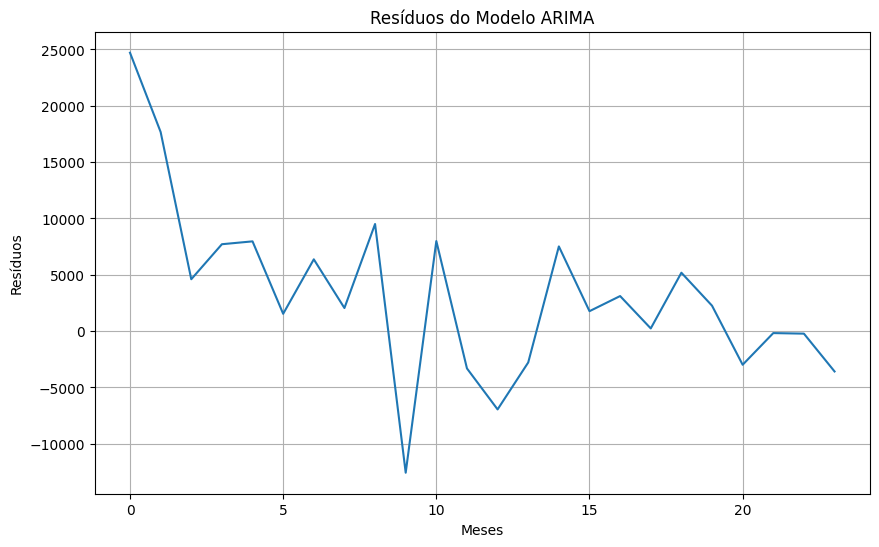

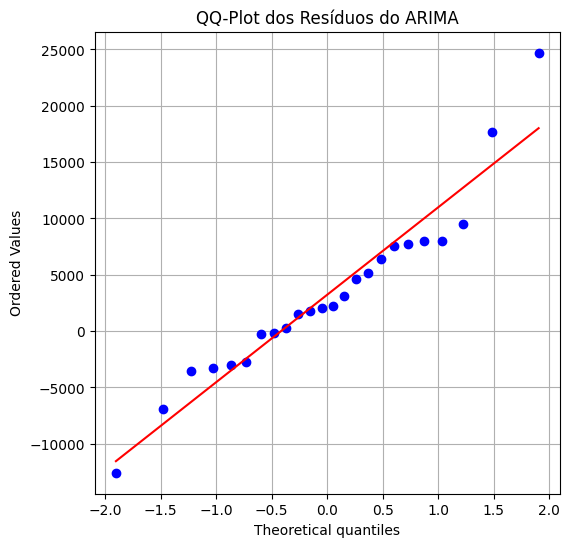

Shapiro-Wilk Teste: W=0.9448130036857518, p-value=0.2086238581533506


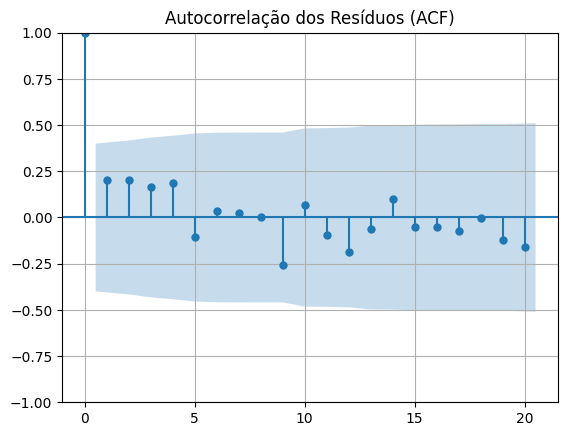

Teste de Ljung-Box:
     lb_stat  lb_pvalue
10  7.645117   0.663457


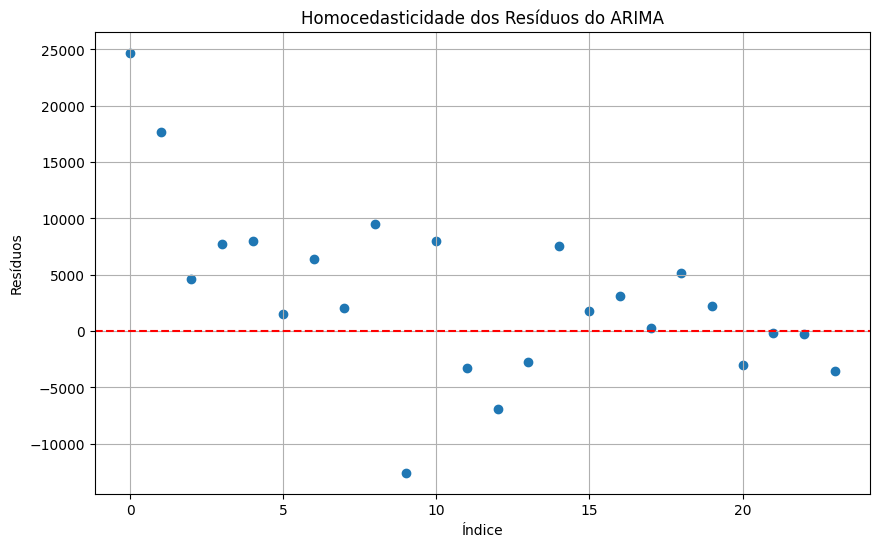

Teste de Durbin-Watson: 1.0305442788630537


In [33]:
# Importando as bibliotecas
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Carrega o dataset
file_path = 'df_case_1_-_500_linhas.csv'
df = pd.read_csv(file_path)

# Filtra os dados para o Produto 'P'
df_produto_p = df[df['PRODUTO'] == 'P']

# Remove as colunas categóricas para focar nos dados de vendas mensais
df_vendas_p = df_produto_p.iloc[:, 8:]  # Colunas a partir de MAR22

# Soma as vendas mensais para o produto P
vendas_totais_p = df_vendas_p.sum()

# Prepara a série de vendas como univariada (soma das vendas totais por mês)
vendas_p_series = vendas_totais_p.values

# Ajusta o ARIMA com todos os dados para fazer a previsão dos próximos 12 meses
arima_final_model = ARIMA(vendas_p_series, order=(2, 1, 2))
arima_final_fit = arima_final_model.fit()

# Obtem os resíduos do modelo
residuos = arima_final_fit.resid

# Cria o gráfico para os resíduos
plt.figure(figsize=(10, 6))
plt.plot(residuos)
plt.title("Resíduos do Modelo ARIMA")
plt.xlabel("Meses")
plt.ylabel("Resíduos")
plt.grid(True)
plt.show()

# Teste de Normalidade (QQ-Plot e Shapiro-Wilk Test)
plt.figure(figsize=(6, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("QQ-Plot dos Resíduos do ARIMA")
plt.grid(True)
plt.show()

# Teste de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print(f"Shapiro-Wilk Teste: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Autocorrelação dos Resíduos (ACF e Teste de Ljung-Box)
plot_acf(residuos, lags=20)
plt.title("Autocorrelação dos Resíduos (ACF)")
plt.grid(True)
plt.show()

# Teste de Ljung-Box
ljungbox_test = acorr_ljungbox(residuos, lags=[10], return_df=True)
print(f"Teste de Ljung-Box:\n{ljungbox_test}")

# Homocedasticidade (Variância constante dos resíduos)
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuos)), residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Homocedasticidade dos Resíduos do ARIMA")
plt.xlabel("Índice")
plt.ylabel("Resíduos")
plt.grid(True)
plt.show()

# Teste de independência (Durbin-Watson)
from statsmodels.stats.stattools import durbin_watson
dw_test = durbin_watson(residuos)
print(f"Teste de Durbin-Watson: {dw_test}")

<a id="resultados-da-análise-de-residuos-do-modelo-arima"></a>
## 5.1 Resultados da Análise de Resíduos do Modelo ARIMA

[Voltar ao Índice](#indice)

**Resultados da Análise de Resíduos do Modelo ARIMA**

**Teste de Normalidade (Shapiro-Wilk):**
- **Estatística W**: 0.9448
- **p-value**: 0.2086
  - Como o **p-value > 0.05**, não rejeitamos a hipótese nula de normalidade. Isso indica que os resíduos seguem uma distribuição normal.

**Autocorrelação dos Resíduos (Teste de Ljung-Box):**
- **Ljung-Box Estatística (Lag 10)**: 7.645
- **p-value**: 0.6635
  - Como o **p-value > 0.05**, não há evidências significativas de autocorrelação nos resíduos. Portanto, os resíduos são independentes no nível de 10 lags.

**Homocedasticidade:**
- O gráfico de dispersão dos resíduos mostra que os resíduos estão distribuídos de maneira aleatória ao redor de zero sem grandes padrões visíveis. Isso indica que a variância dos resíduos é constante.

**Independência (Durbin-Watson):**
- **Durbin-Watson Estatística**: 1.03
  - Um valor próximo de 2 indicaria que os resíduos são independentes. Como o valor de **1.03** é mais próximo de 1 significa alguma autocorrelação positiva nos resíduos.

<a id="conclusao-da-analise-de-residuos"></a>
## 5.2 Conclusão da análise de resíduos

[Voltar ao Índice](#indice)

**Conclusão Conclusão da análise de resíduos**
- Os resíduos parecem seguir uma distribuição normal e não apresentam sinais de autocorrelação significativa (pelo teste de Ljung-Box).
- Porém, o valor do **Durbin-Watson** indica que pode ter alguma autocorrelação positiva nos resíduos.